In [1]:
from tools import *
%matplotlib notebook

In [2]:
data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev.csv')
data = data.iloc[(data['PDC'].values > 0)]
#cind =  ((data['campaign'].values == 16) & (data['Channel'].values == 70))
data['gMeanPSFMagErr'] = data['gMeanPSFMagErr'].values * (1.012) 
data['rMeanPSFMagErr'] = data['rMeanPSFMagErr'].values * (1.005) 
data['iMeanPSFMagErr'] = data['iMeanPSFMagErr'].values * (1.005) 
data['zMeanPSFMagErr'] = data['zMeanPSFMagErr'].values * (1.005)
data['kMeanPSFMag'] = -2.5*np.log10(data['PDC'].values)
data['kMeanPSFMagErr'] = np.abs(data['PDCe'].values) / np.abs(data['PDC'].values)/10

In [3]:
camp = 17
ex, dat = Tonry_reduce(data,camp)

Pass 1: 0.01806250000000001
Pass 2: 0.01806250000000001


In [5]:
ex16, dat16 = Tonry_reduce(data,16)
ex15, dat15 = Tonry_reduce(data,15)
ex2, dat2 = Tonry_reduce(data,2)

Pass 1: 0.014687500000000003
Pass 2: 0.014044921875000001
Pass 1: 0.08650000000000013
Pass 2: 0.08616210937500013
Pass 1: 0.10600000000000018
Pass 2: 0.10600000000000018


In [6]:
model = np.load('caspec_MS_mags.npy',allow_pickle=True).item()
compare = np.array([['g-r','g-z'],['g-r','r-z'],['g-r','i-z'],['g-r','g-i']])

c = Make_colours(dat,model,compare,Extinction = ex)

In [9]:
c['obs g-r'].shape

(2, 9520)

In [14]:
dat16['zMeanPSFMag'].shape

(9520,)

In [21]:
xx = model['g'] - model['r']
x = dat16['gMeanPSFMag'] - dat16['rMeanPSFMag']

In [17]:
xx.shape

(182,)

In [18]:
c['mod g-r'].shape

(133,)

<IPython.core.display.Javascript object>


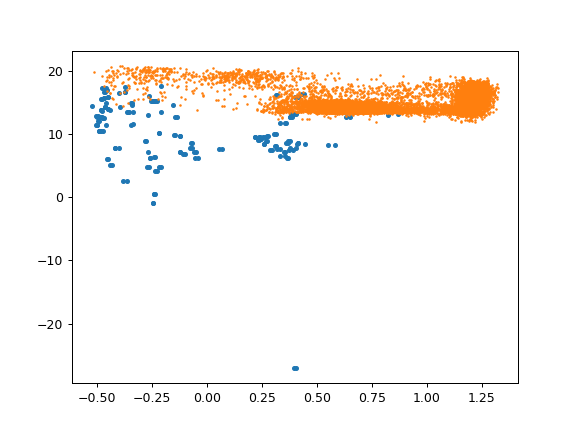

In [24]:
plt.figure()
plt.plot(xx,model['z'],'.')
plt.plot(x,dat16['zMeanPSFMag'],'.',ms=2)

In [46]:
path = '../stellar_spec/pickle/'
files = glob(path + '*.dat')
files = [x for x in files if (('ukr' not in x) and ('ukw' not in x))]
def Specs(Specs):
    specs = {}
    for spec in Specs:
        model_sed = source_synphot.source.pre_process_source(spec,np.nan,'ps1g',0,Renorm=False)
        specs[spec] = model_sed
    return specs
pickle = Specs(files)

passbands = at.Table.read('source_synphot/passbands/pbzptmag.txt',format='ascii')
pbnames = [x['obsmode'] for x in passbands if x['passband'].startswith("Kep")]
pbnames += [x['obsmode'] for x in passbands if x['passband'].startswith("PS1")]
model_mags = 0.
model = 'AB'
pbs = source_synphot.passband.load_pbs(pbnames, model_mags, model)
pbnames = pbs.keys()

model = Spec_mags(pickle,pbs,ex)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


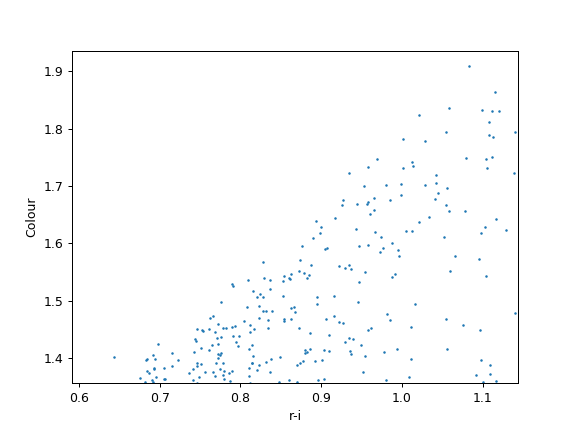

Text(0.5, 0, 'r-i')

In [49]:
tonry = np.loadtxt('Tonry_splines.txt')
compare = np.array([['r-i','g-r'],['r-i','i-z']])
colours = Make_colours(data.iloc[data.campaign.values == 2],tonry,compare,Extinction = ex,Tonry=True)
#colours = Make_colours(dat,tonry,compare,Extinction = ex,Tonry=True)
plt.figure()
plt.plot(colours['obs r-i'][0],colours['obs g-r'][0],'.',ms=2)
plt.plot(colours['obs r-i'][0],colours['obs i-z'][0]-.5,'.',ms=2)
plt.plot(tonry[:,0],tonry[:,1],'-')
plt.plot(tonry[:,0],tonry[:,2]-.5,'-')

plt.plot(model['r']-model['i'],model['g']-model['r'],'xk',ms=3)
plt.plot(model['r']-model['i'],model['i']-model['z']-.5,'x',ms=3)
plt.ylabel('Colour')
plt.xlabel('r-i')

In [6]:
model = np.load('caspec_MS_mags.npy',allow_pickle=True).item()

In [22]:
data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev.csv')
data = data.iloc[(data['PDC'].values > 0)]

In [23]:
data.

ID  campaign   Kpmag     RAJ2000   DecJ2000  \
0       240252225        11  12.865  263.793562 -29.997039   
1       240256177        11  15.209  264.202808 -29.983788   
2       231458371        11  13.843  257.353395 -29.979526   
3       231461068        11  15.238  257.460891 -29.969176   
4       235586661        11  17.005  259.600918 -29.968737   
...           ...       ...     ...         ...        ...   
163354  202064761         0  18.400  101.395000  28.836400   
163355  202066738         0  14.600  101.028900  28.868520   
163356  202085664         0  15.900  101.397410  28.888150   
163357  202067114         0  14.400  100.956330  28.919800   
163358  202090563         0  14.600  101.356080  28.961580   

                     objID  ps_score      raMean    decMean  raMeanErr  ...  \
0        72002637935683847  0.859804  263.793568 -29.997021    0.00462  ...   
1        72012642029659459  0.835958  264.203038 -29.984112    0.00844  ...   
2        72022573533964867  0.899167  257.353383 -29.979531    0.00494  ...   
3        72032574608577262  0.905000  257.460843 -29.969208    0.00238  ...   
4        72032596009007860  0.931750  259.600903 -29.968721    0.00347  ...   
...                    ...       ...         ...        ...        ...  ...   
163354  142601013953554418  0.992101  101.395334  28.836538    0.00303  ...   
163355  142641010288792817  0.995208  101.028904  28.868524    0.00457  ...   
163356  142661013974826192  0.966280  101.397416  28.887992    0.00289  ...   
163357  142701009562734305  0.983958  100.956319  28.919805    0.01055  ...   
163358  142751013560434379  0.998750  101.355993  28.961456    0.00415  ...   

        yQfPerfect  primaryDetection  bestDetection  Module  Channel  Output  \
0         0.998782                 1              1       6       16       4   
1         0.999765                 1              1       6       16       4   
2         0.999408                 1              1      16       53       1   
3         0.999134                 1              1      16       53       1   
4         0.999068                 1              1      16       55       3   
...            ...               ...            ...     ...      ...     ...   
163354    0.999513                 1              1      10       32       4   
163355    0.998875                 1              1      10       32       4   
163356    0.999583                 1              1      10       32       4   
163357    0.999572                 1              1      10       32       4   
163358    0.999650                 1              1      10       32       4   

                 PDC          PDCe           SAP          SAPe  
0       25301.869945  11528.469253  24838.423107  12004.054269  
1        5728.921506    674.671919   5672.403149    799.376657  
2       49534.755974  23655.657632  49734.239736  23516.686200  
3       45788.342836  18583.963914  45029.506741  18875.511008  
4        9201.518296   1589.902547   9017.230503   1558.882332  
...              ...           ...           ...           ...  
163354   2345.906732    321.487615   2286.911499    496.439072  
163355  18537.366596   6989.196082  18224.444214   5037.861100  
163356  12984.416433   4694.344015  12648.535980   4951.679903  
163357  22587.121204   8626.266543  22305.766510   6859.859068  
163358  45043.348605  14841.564461  41094.378448  11734.877707  

[143983 rows x 54 columns]

mean:0.022930 (uncertainty:0.000182)
Pass 1: 0.014750000000000003
mean:0.022777 (uncertainty:0.000180)
Pass 2: 0.014035546875000002
mean:0.026532 (uncertainty:0.000238)
Pass 1: 0.08906250000000013
mean:0.026207 (uncertainty:0.000233)
Pass 2: 0.08645324707031261


In [31]:
data.campaign.unique()

array([11,  7,  2, 15,  3,  6, 17, 12,  1,  8, 14, 18,  5,  4, 16, 13,  0])

mean:0.018449 (uncertainty:0.000231)
Pass 1: 0.04456250000000005
mean:0.018449 (uncertainty:0.000231)
Pass 2: 0.04449287109375005


In [43]:
dat19

ID  campaign      Kpmag    RAJ2000  DecJ2000  \
80899  251720075        19  18.152000  341.59024 -0.087758   
80900  246428828        19  17.464001  346.75836 -0.089732   
80902  246428858        19  17.679001  347.21164 -0.088899   
80906  246428849        19  17.657000  347.85638 -0.089129   
80908  246428973        19  15.134000  347.94144 -0.085087   
...          ...       ...        ...        ...       ...   
98781  251784813        19  16.187000  346.48193  3.584523   
98861  251785522        19  15.152000  346.37260  3.617093   
98889  251785745        19  15.682000  346.37967  3.625944   
99004  251786841        19  15.912000  346.47757  3.671874   
99107  251787713        19  16.238001  346.53793  3.705321   

                    objID  ps_score      raMean   decMean  raMeanErr  ...  \
80899  107893415903465148  1.000000  341.590347 -0.087790    0.01802  ...   
80900  107893467583062790  1.000000  346.758318 -0.089686    0.00214  ...   
80902  107893472117973765  1.000000  347.211809 -0.088892    0.00332  ...   
80906  107893478563883497  1.000000  347.856370 -0.089135    0.00177  ...   
80908  107893479417428161  0.988845  347.941894 -0.085265    0.00371  ...   
...                   ...       ...         ...       ...        ...  ...   
98781  112303464819891978  0.996667  346.481941  3.584591    0.00144  ...   
98861  112343463727030954  0.968702  346.372675  3.617058    0.00476  ...   
98889  112353463796581569  0.998750  346.379698  3.625965    0.00144  ...   
99004  112403464776386731  0.998750  346.477620  3.671864    0.00274  ...   
99107  112443465378846851  1.000000  346.537901  3.705303    0.00252  ...   

       bestDetection  Module  Channel  Output  PDC  PDCe  SAP  SAPe  \
80899              1      -1       -1      -1 -1.0  -1.0 -1.0  -1.0   
80900              1      -1       -1      -1 -1.0  -1.0 -1.0  -1.0   
80902              1      -1       -1      -1 -1.0  -1.0 -1.0  -1.0   
80906              1      -1       -1      -1 -1.0  -1.0 -1.0  -1.0   
80908              1      -1       -1      -1 -1.0  -1.0 -1.0  -1.0   
...              ...     ...      ...     ...  ...   ...  ...   ...   
98781              1      -1       -1      -1 -1.0  -1.0 -1.0  -1.0   
98861              1      -1       -1      -1 -1.0  -1.0 -1.0  -1.0   
98889              1      -1       -1      -1 -1.0  -1.0 -1.0  -1.0   
99004              1      -1       -1      -1 -1.0  -1.0 -1.0  -1.0   
99107              1      -1       -1      -1 -1.0  -1.0 -1.0  -1.0   

       kMeanPSFMag  kMeanPSFMagErr  
80899          NaN             0.1  
80900          NaN             0.1  
80902          NaN             0.1  
80906          NaN             0.1  
80908          NaN             0.1  
...            ...             ...  
98781          NaN             0.1  
98861          NaN             0.1  
98889          NaN             0.1  
99004          NaN             0.1  
99107          NaN             0.1  

[3723 rows x 56 columns]

In [20]:
colours

{'obs r-i': array([], shape=(2, 0), dtype=float64),
 'obs g-r': array([], shape=(2, 0), dtype=float64),
 'mod r-i': array([-0.49237805, -0.49137805, -0.49037805, ...,  1.99062195,
         1.99162195,  1.99262195]),
 'mod g-r': array([-0.64200074, -0.64063652, -0.63927231, ...,  1.24930105,
         1.24946754,  1.24963404]),
 'obs i-z': array([], shape=(2, 0), dtype=float64),
 'mod i-z': array([-0.64200074, -0.64063652, -0.63927231, ...,  1.24930105,
         1.24946754,  1.24963404])}

In [15]:
def Tonry_reduce(Data,Camp):
    '''
    Uses the Tonry et al. 2012 PS1 splines to fit dust and find all outliers.
    '''
    data = copy.deepcopy(Data)
    tonry = np.loadtxt('Tonry_splines.txt')
    compare = np.array([['r-i','g-r'],['r-i','i-z']])   
    cind =  ((data['campaign'].values == Camp))
    dat = data.iloc[cind]
    clips = []
    for i in range(2):
        if i == 0:
            k0 = 0.01
        else:
            k0 = res.x
        res = minimize(Tonry_fit,k0,args=(dat,tonry,compare),method='Nelder-Mead')
        
        colours = Make_colours(dat,tonry,compare,Extinction = res.x, Tonry = True)
        clip = Tonry_clip(colours)
        clips += [clip]
        dat = dat.iloc[clip]
        print('Pass ' + str(i+1) + ': '  + str(res.x[0]))
    clips[0][clips[0]] = clips[1]
    
    #clipped_data = data.iloc[clips[0]] 
    return res.x, dat

Pass 1: 0.01806250000000001
Pass 2: 0.01806250000000001


<IPython.core.display.Javascript object>


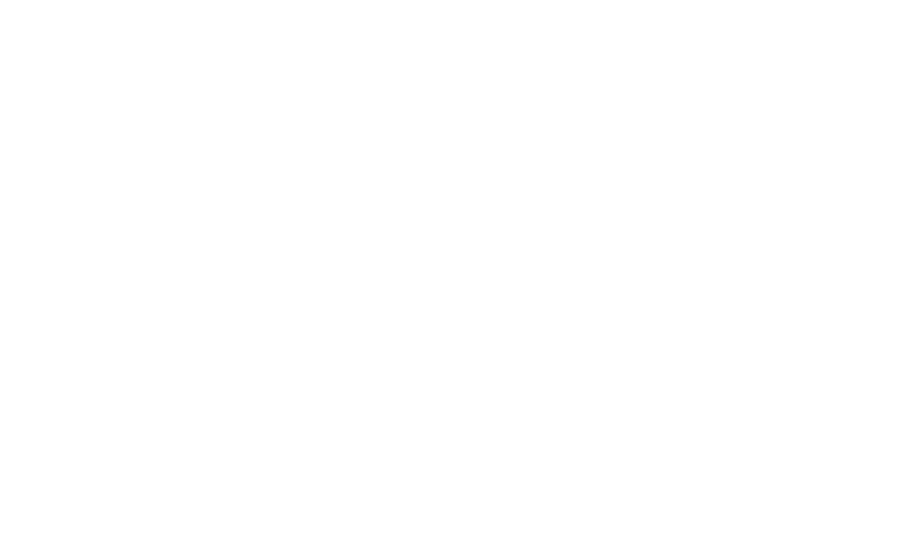

<IPython.core.display.Javascript object>


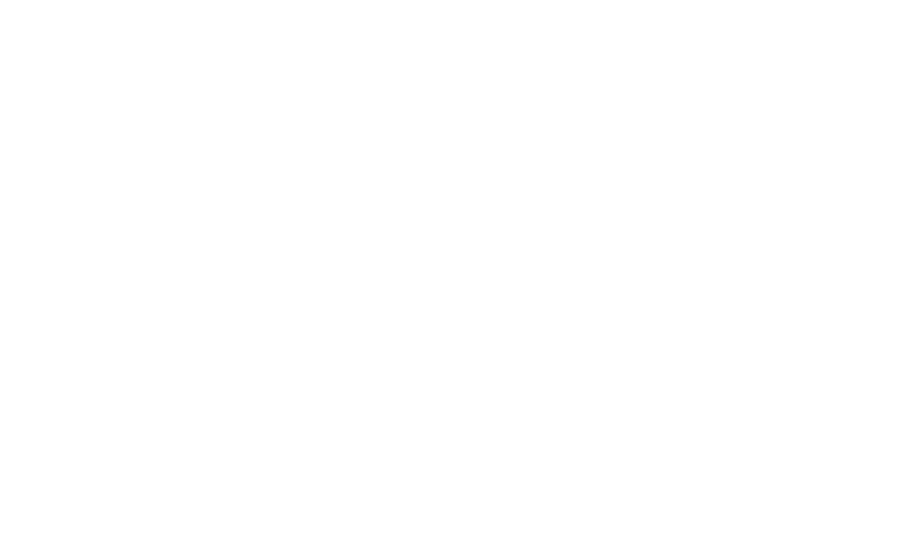

<IPython.core.display.Javascript object>


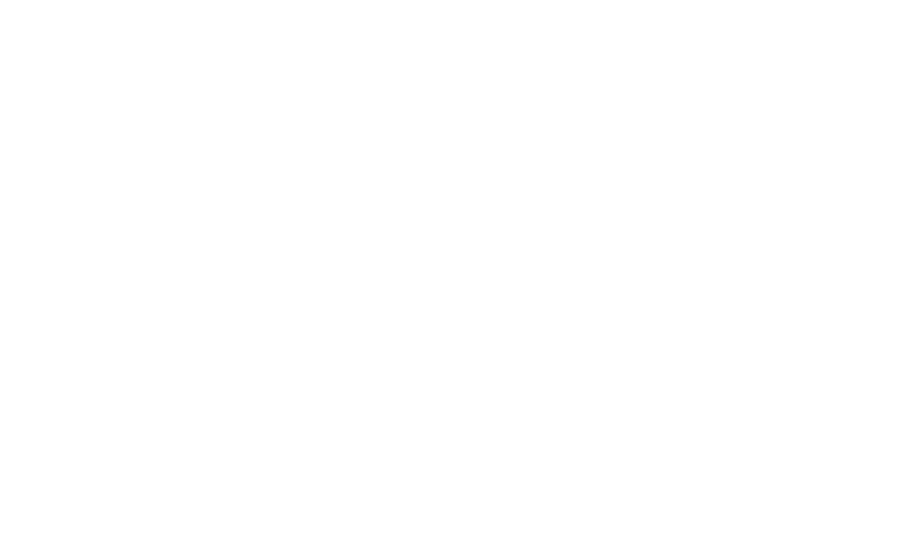

<IPython.core.display.Javascript object>


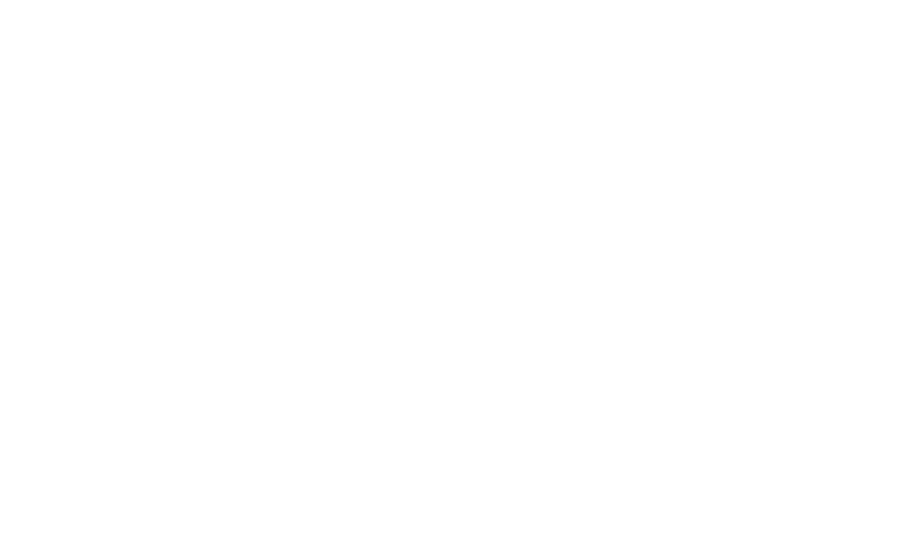

<IPython.core.display.Javascript object>


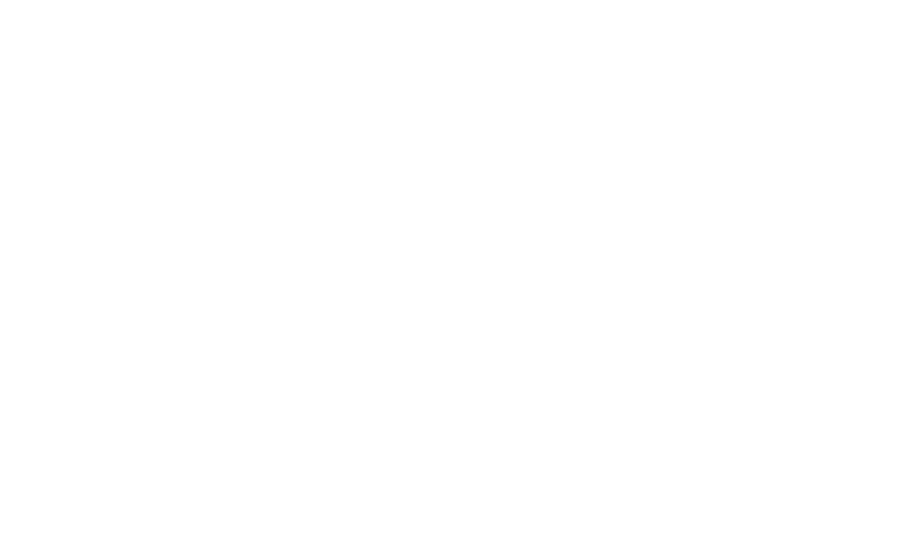

<IPython.core.display.Javascript object>


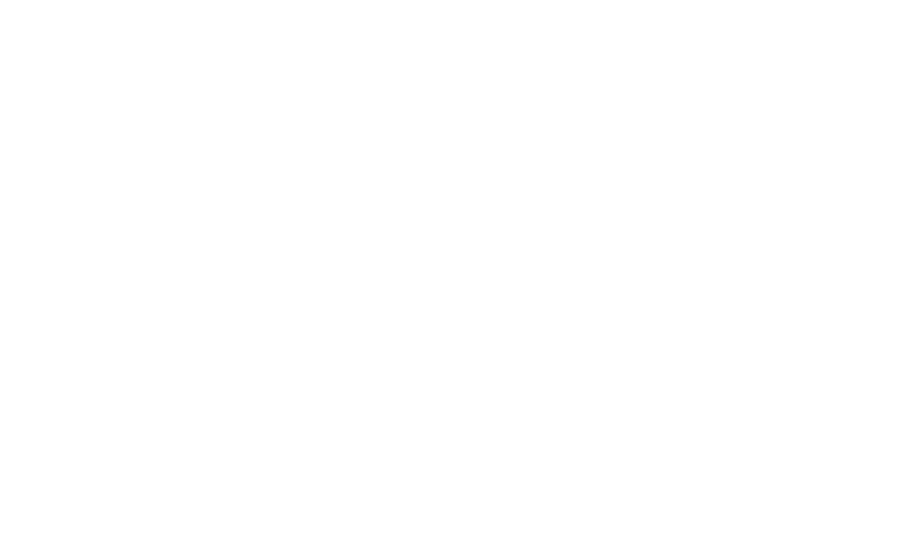

<IPython.core.display.Javascript object>


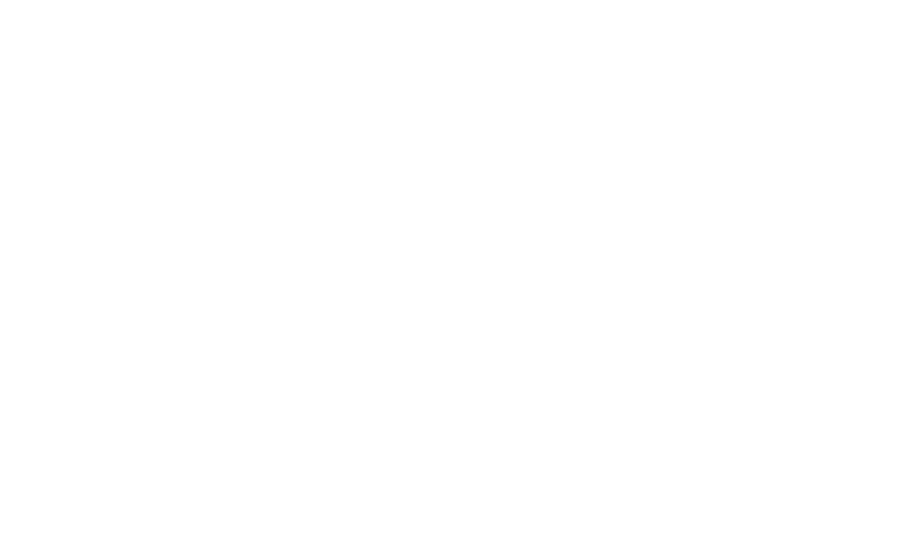

<IPython.core.display.Javascript object>


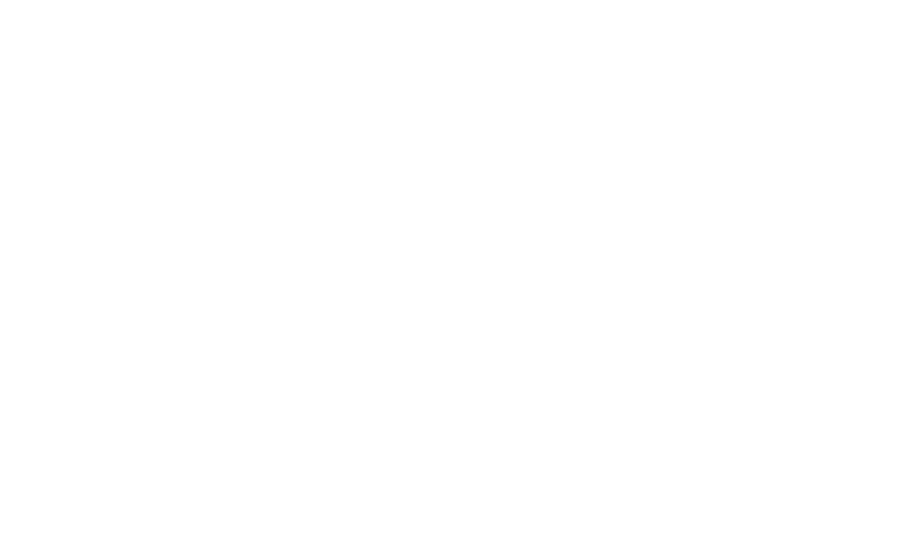

<IPython.core.display.Javascript object>


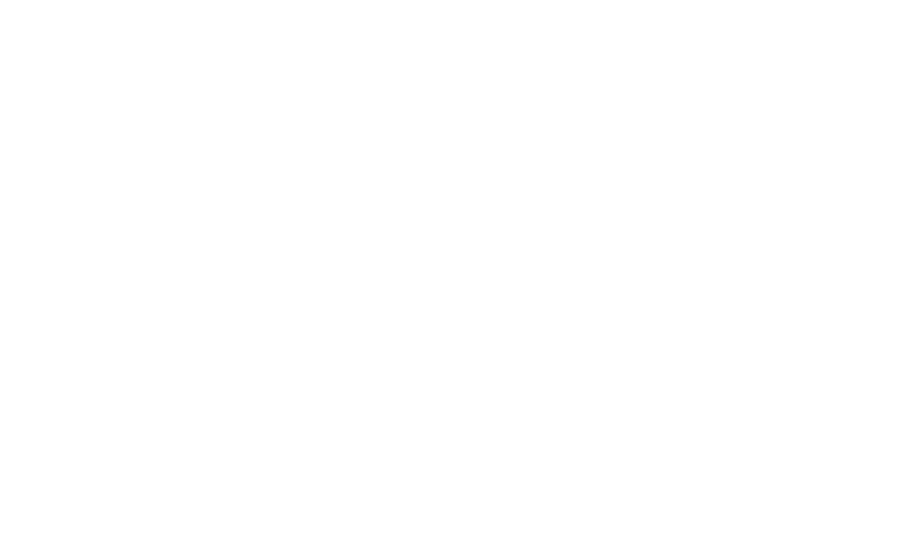

<IPython.core.display.Javascript object>


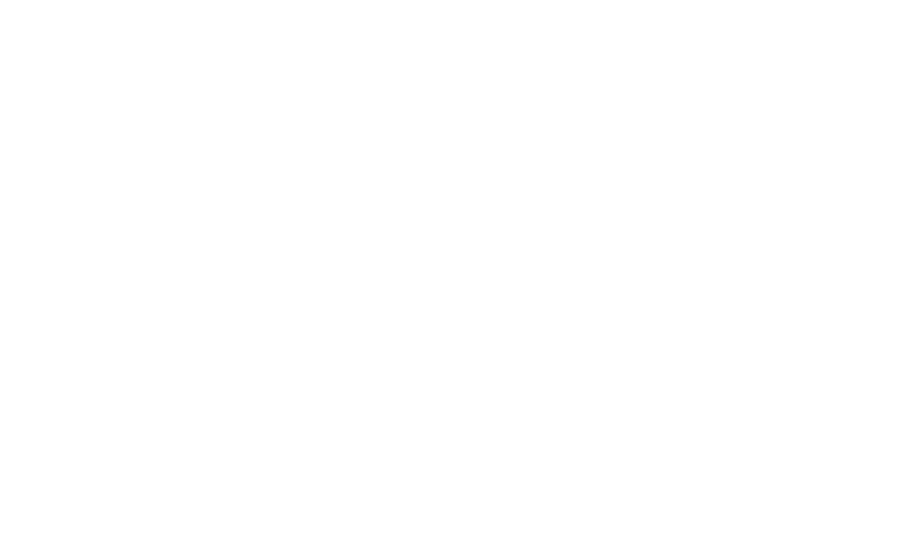

<IPython.core.display.Javascript object>


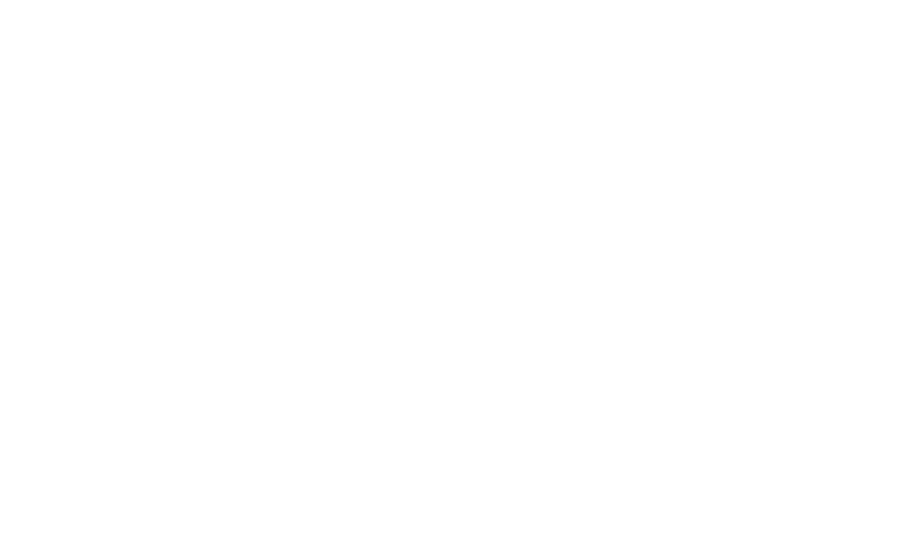

<IPython.core.display.Javascript object>


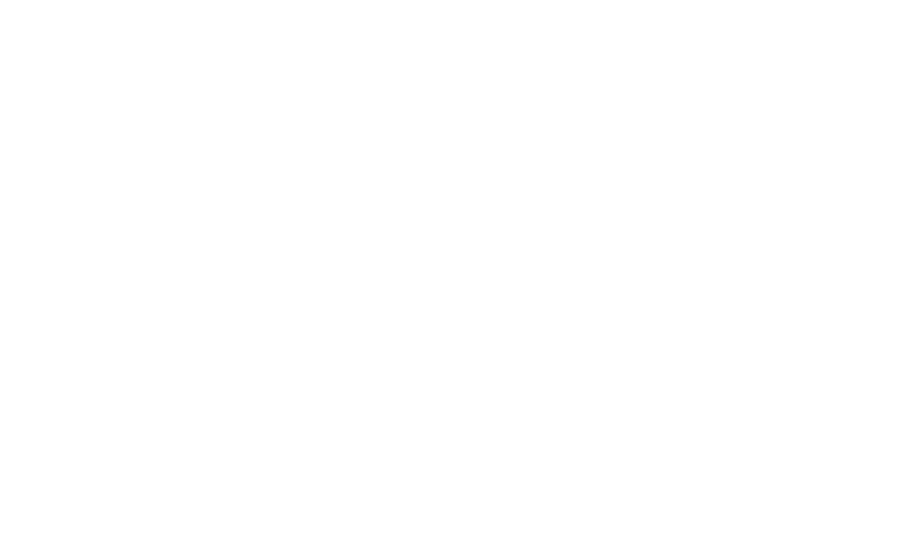

<IPython.core.display.Javascript object>


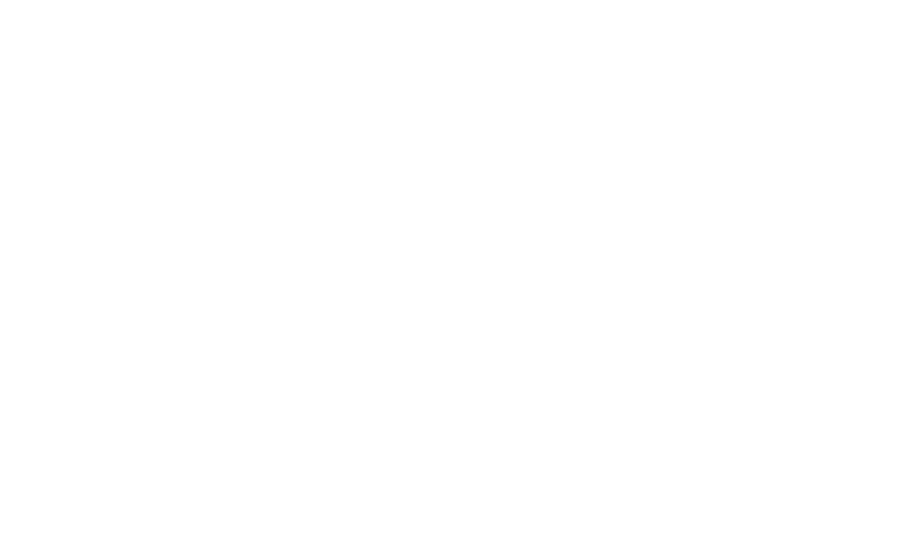

<IPython.core.display.Javascript object>


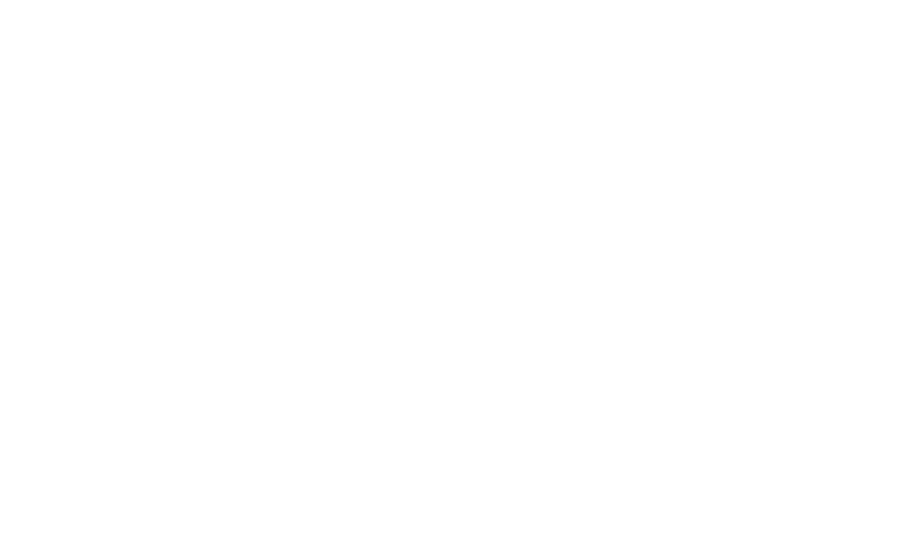

<IPython.core.display.Javascript object>


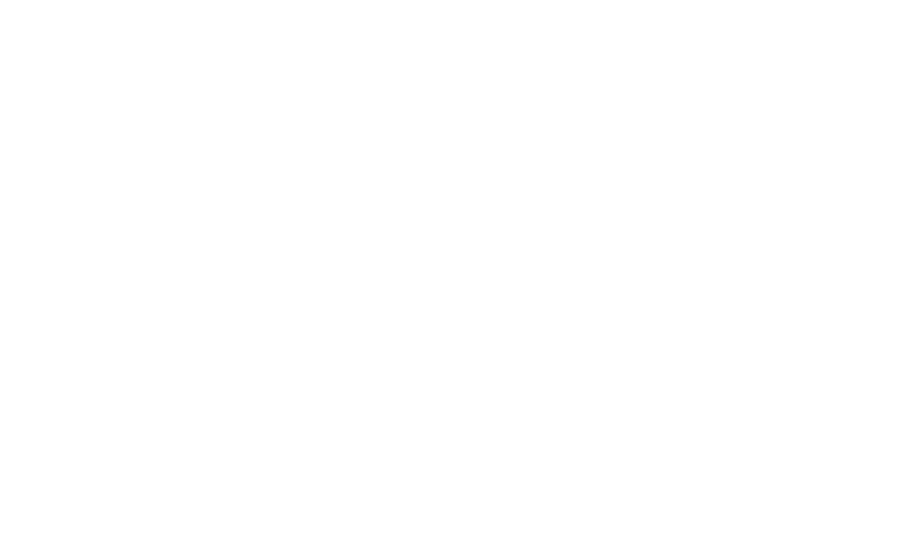

<IPython.core.display.Javascript object>


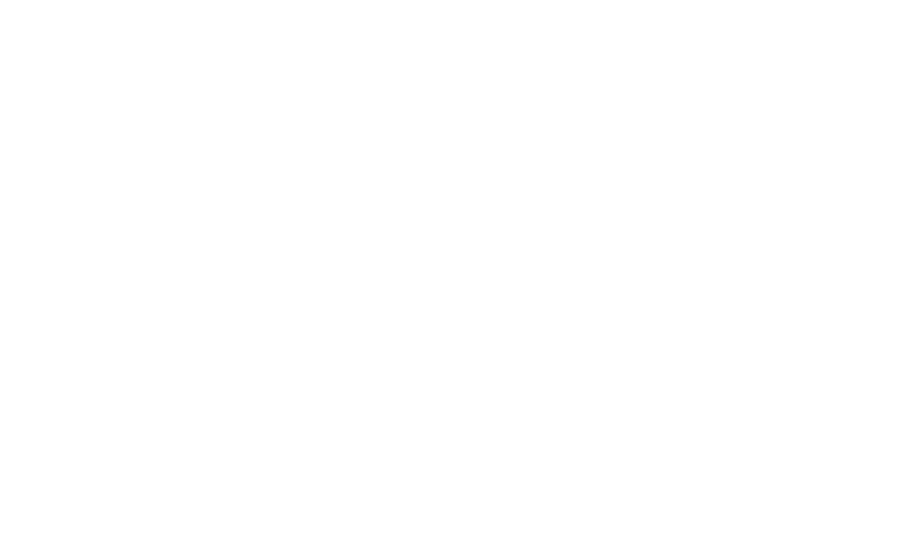

<IPython.core.display.Javascript object>


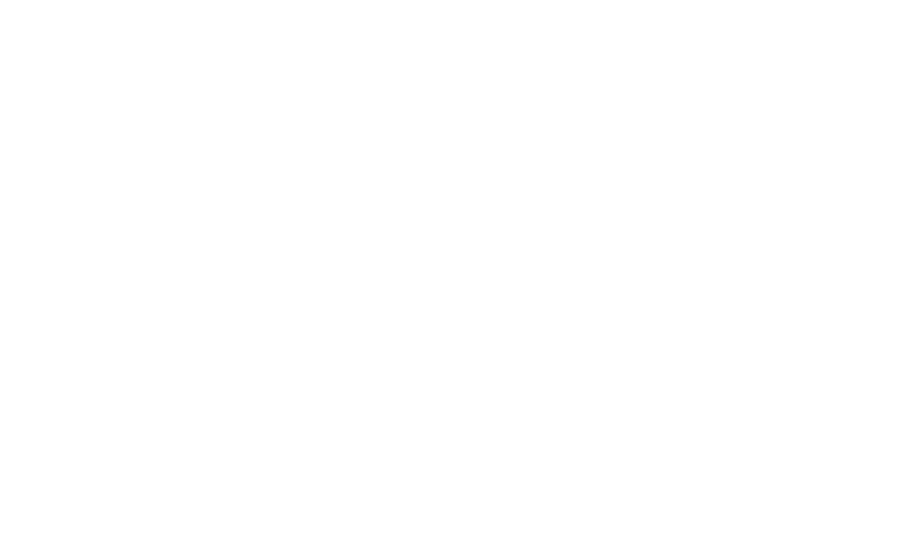

<IPython.core.display.Javascript object>


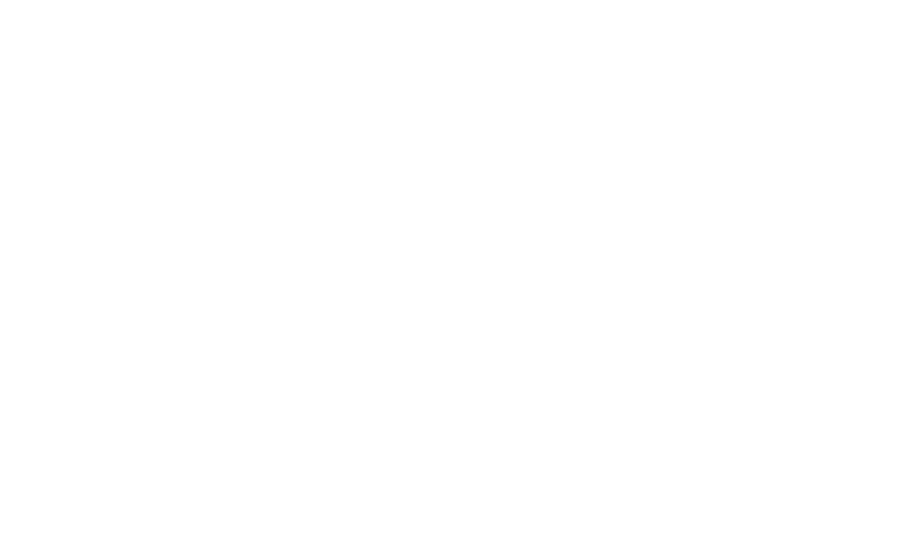

<IPython.core.display.Javascript object>


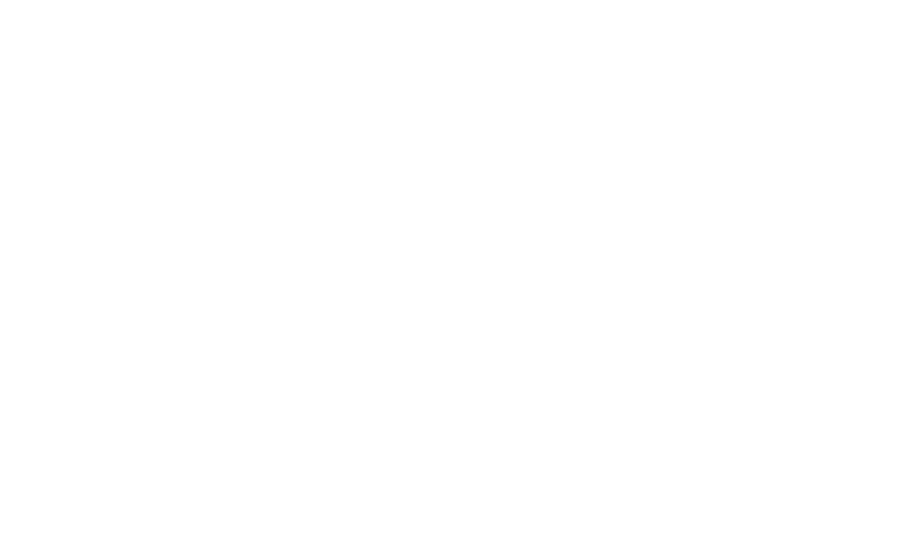

<IPython.core.display.Javascript object>


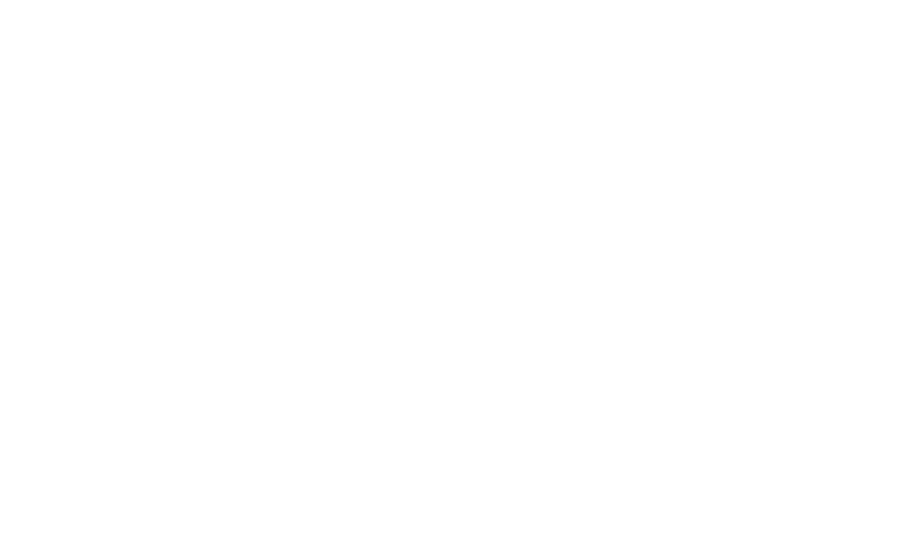

<IPython.core.display.Javascript object>


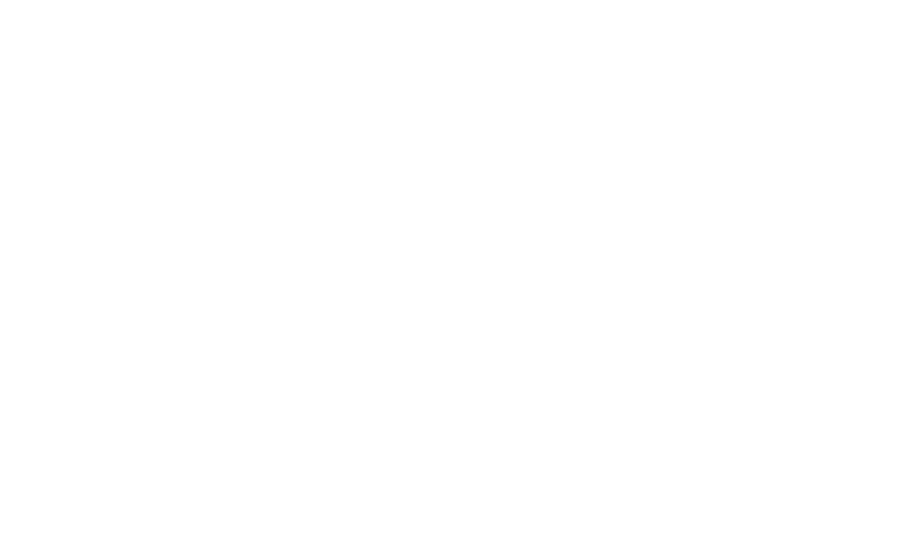

<IPython.core.display.Javascript object>


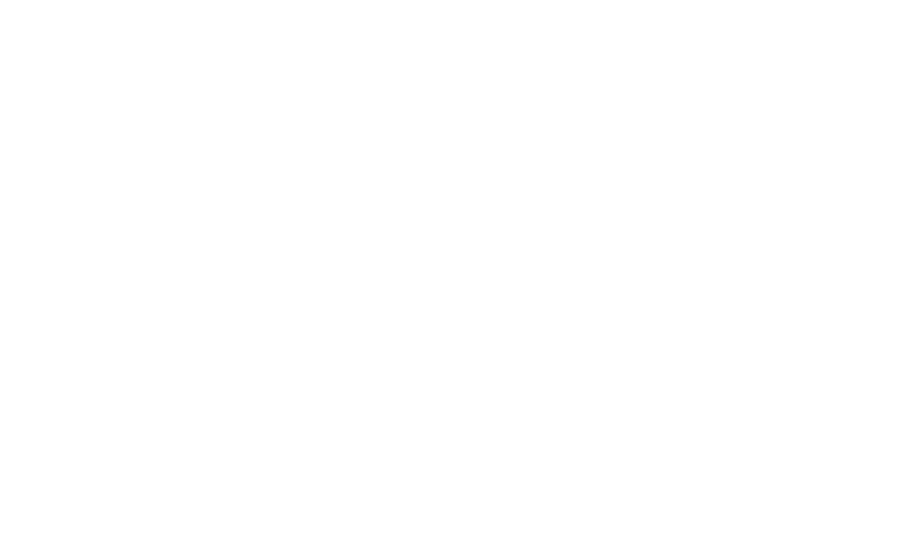

<IPython.core.display.Javascript object>


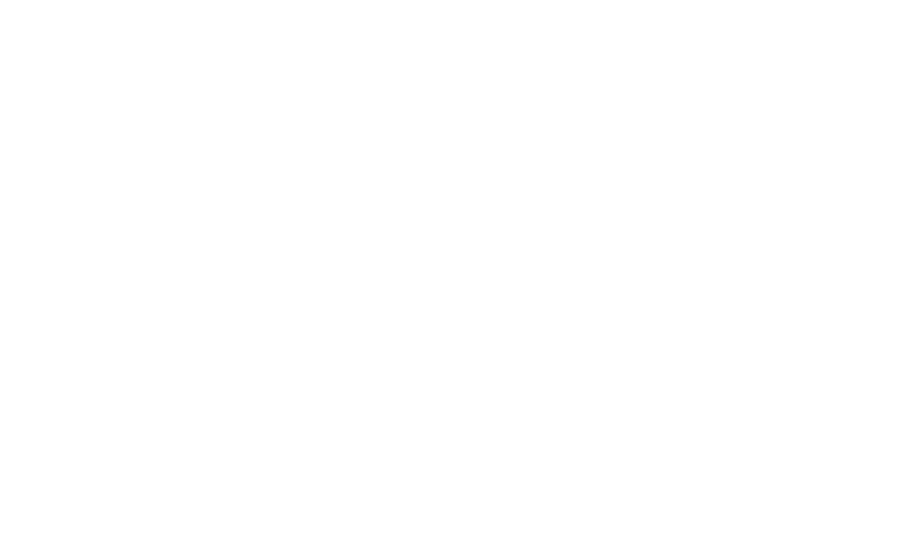

<IPython.core.display.Javascript object>


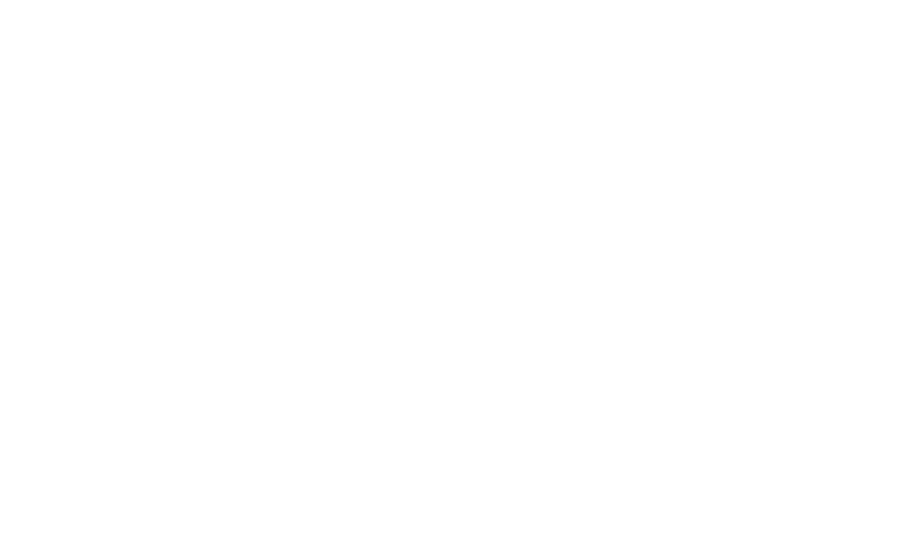

<IPython.core.display.Javascript object>


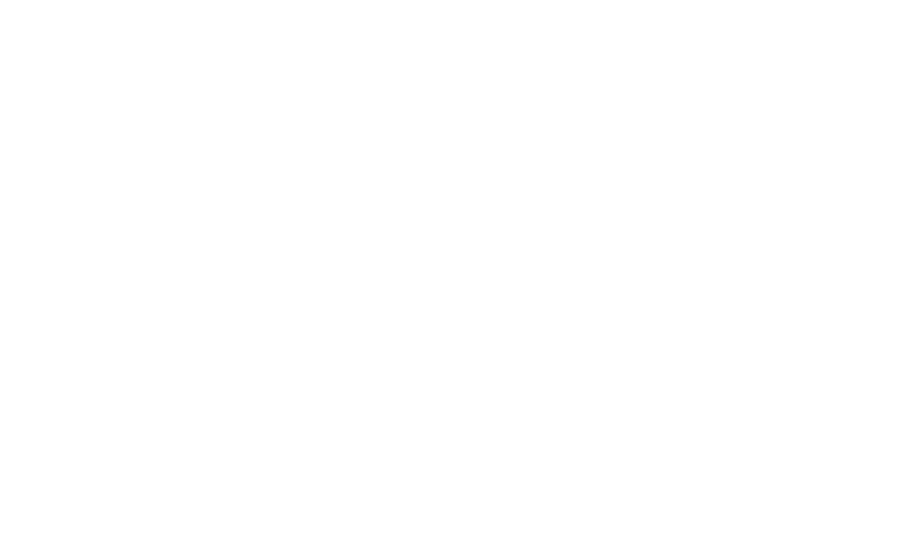

<IPython.core.display.Javascript object>


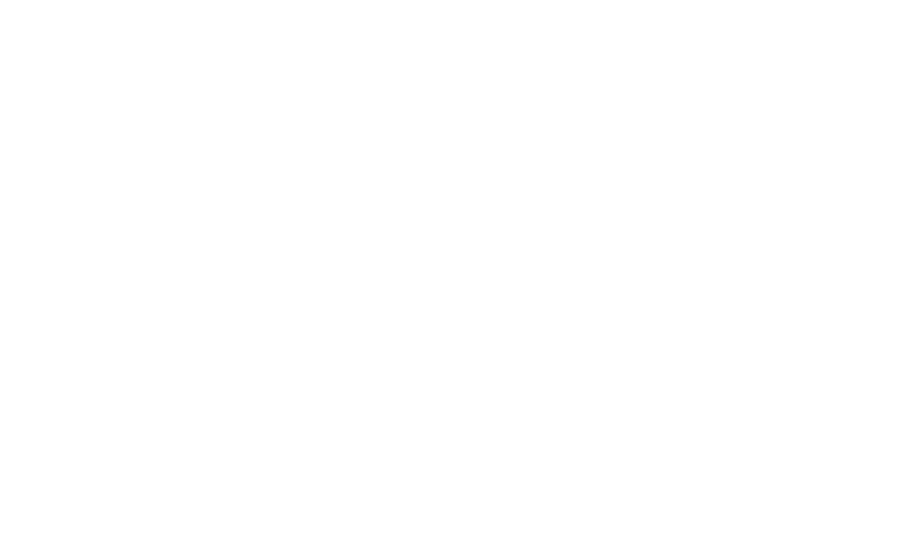

<IPython.core.display.Javascript object>


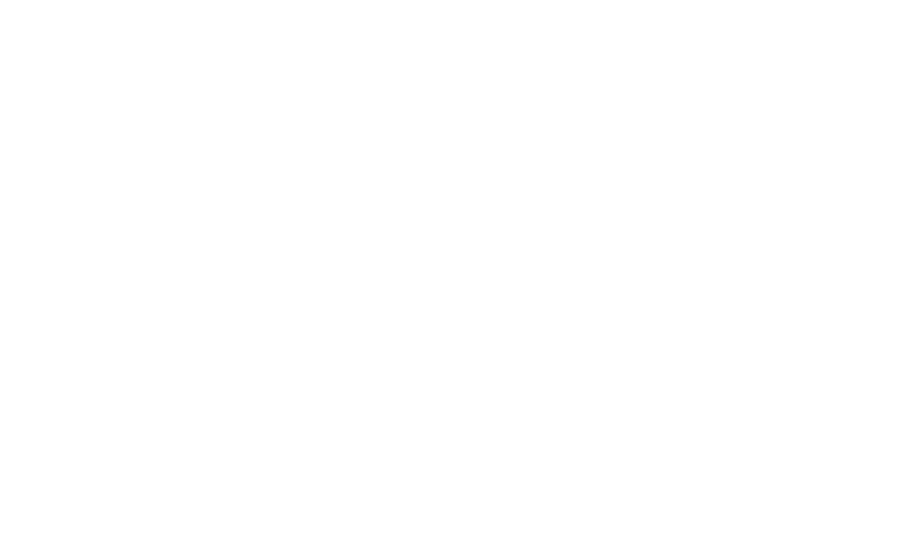

<IPython.core.display.Javascript object>


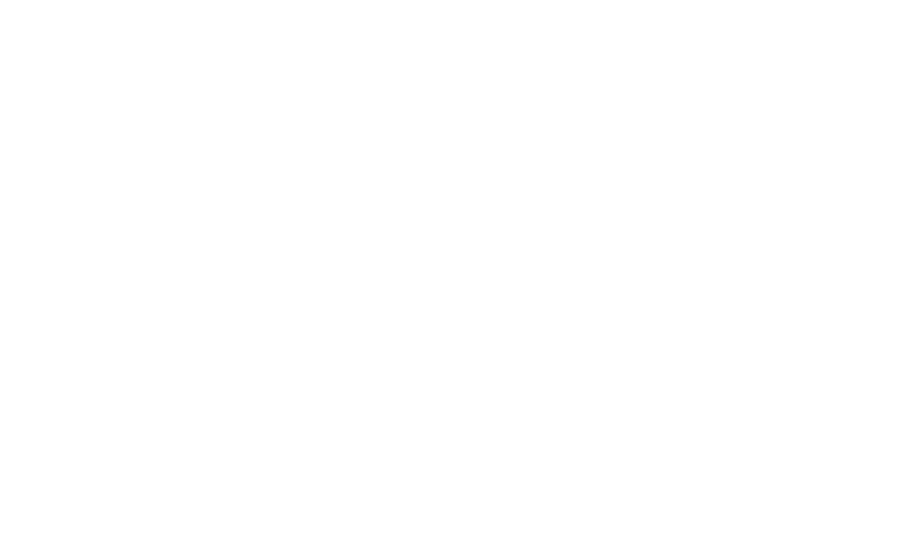

<IPython.core.display.Javascript object>


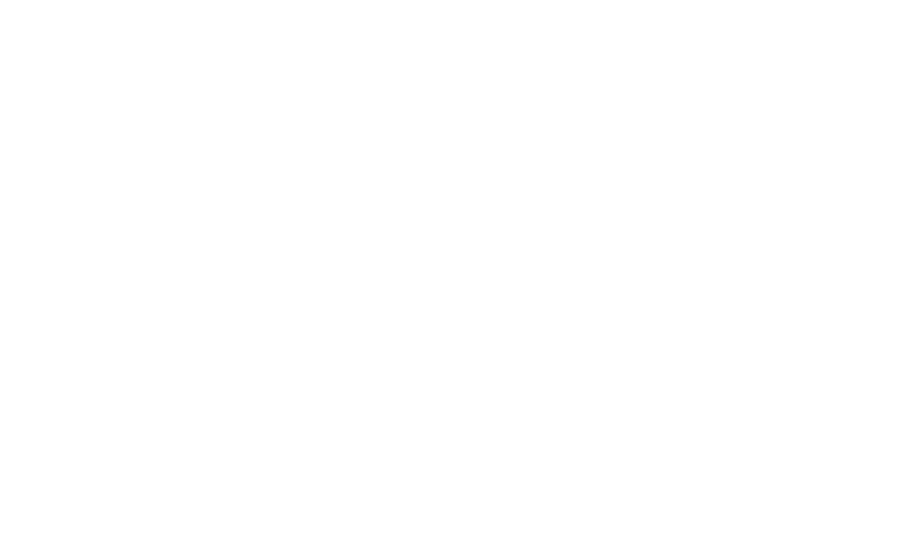

<IPython.core.display.Javascript object>


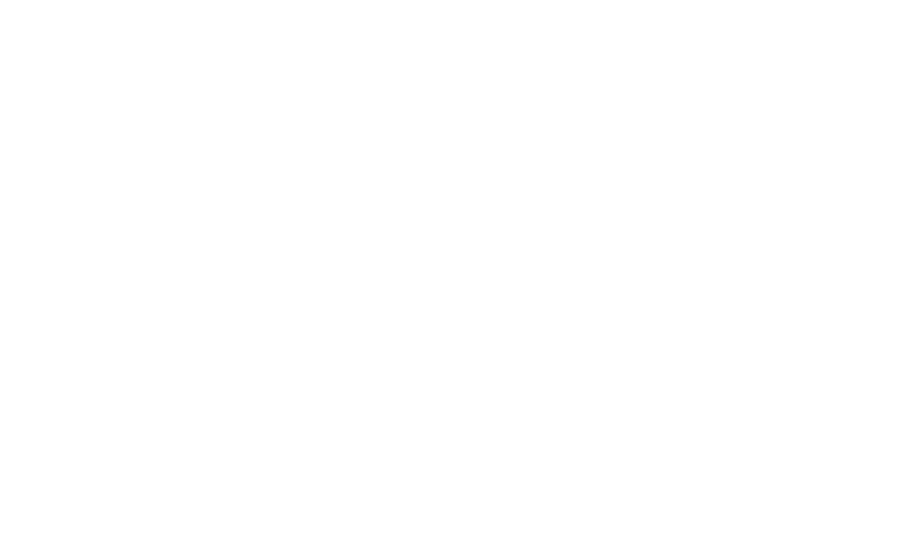

<IPython.core.display.Javascript object>


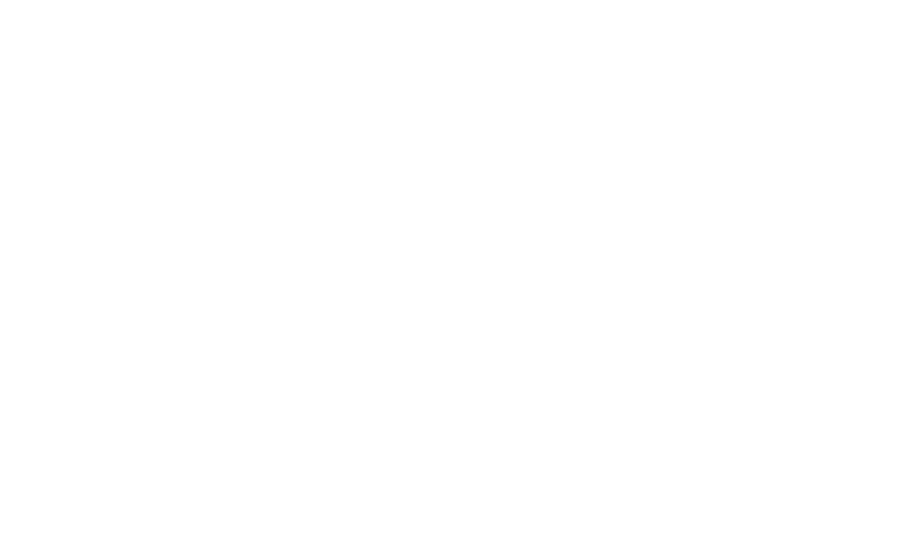

<IPython.core.display.Javascript object>


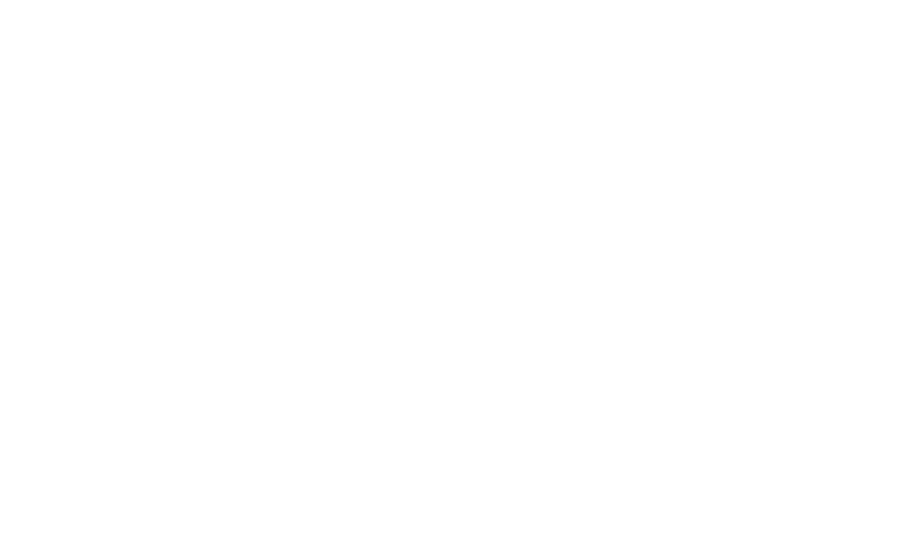

<IPython.core.display.Javascript object>


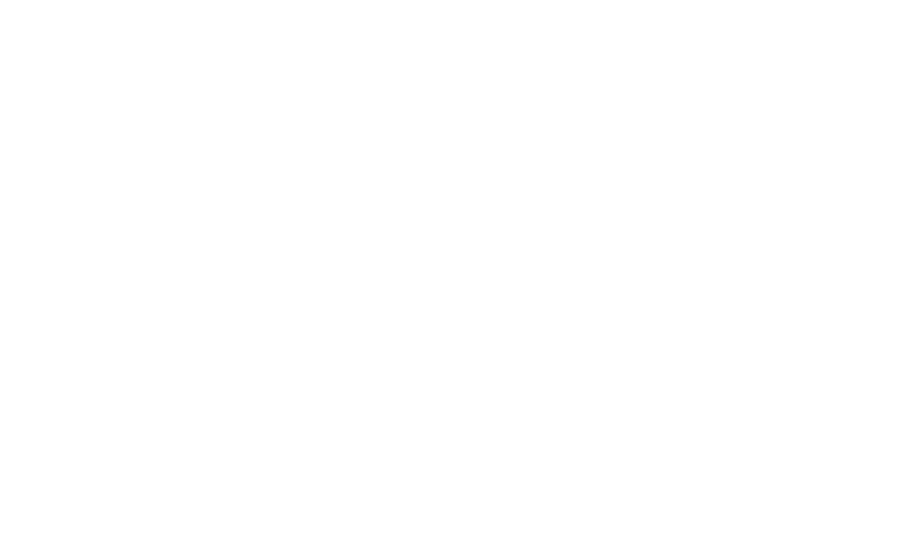

<IPython.core.display.Javascript object>


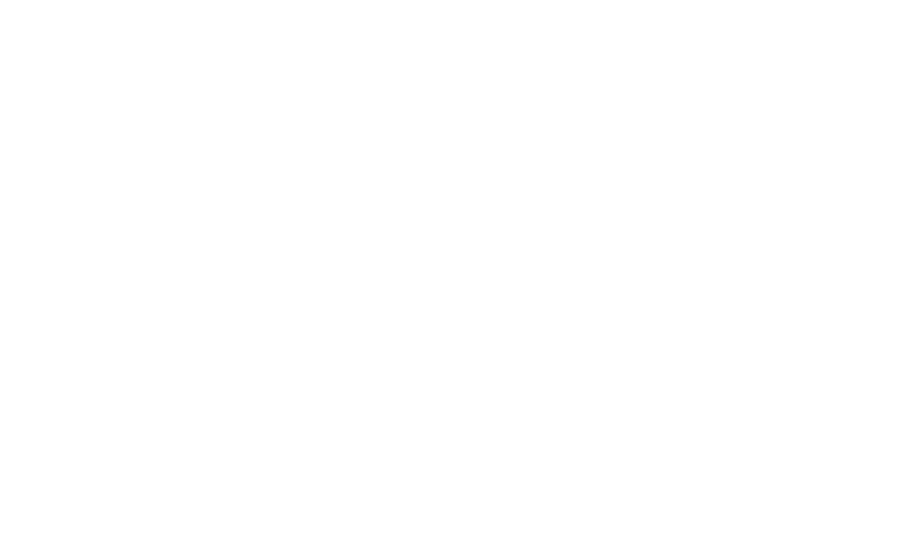

<IPython.core.display.Javascript object>


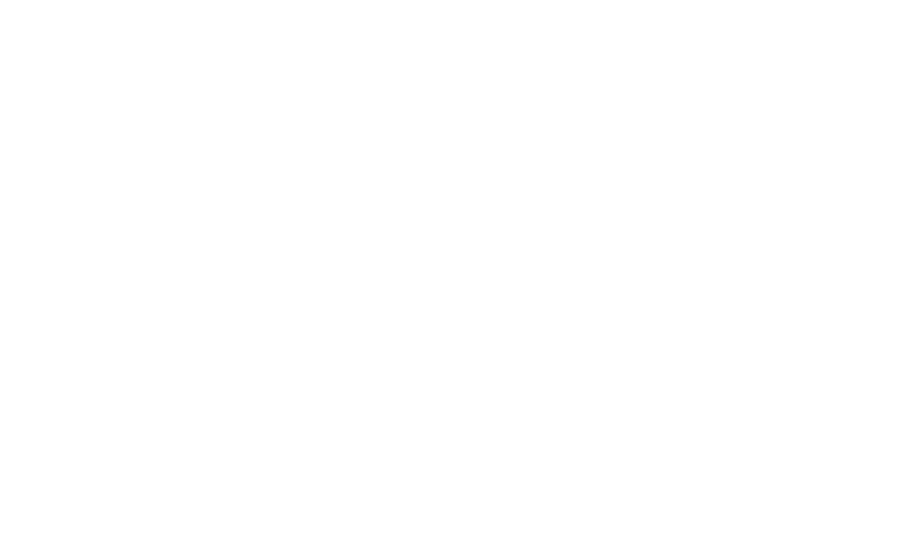

<IPython.core.display.Javascript object>


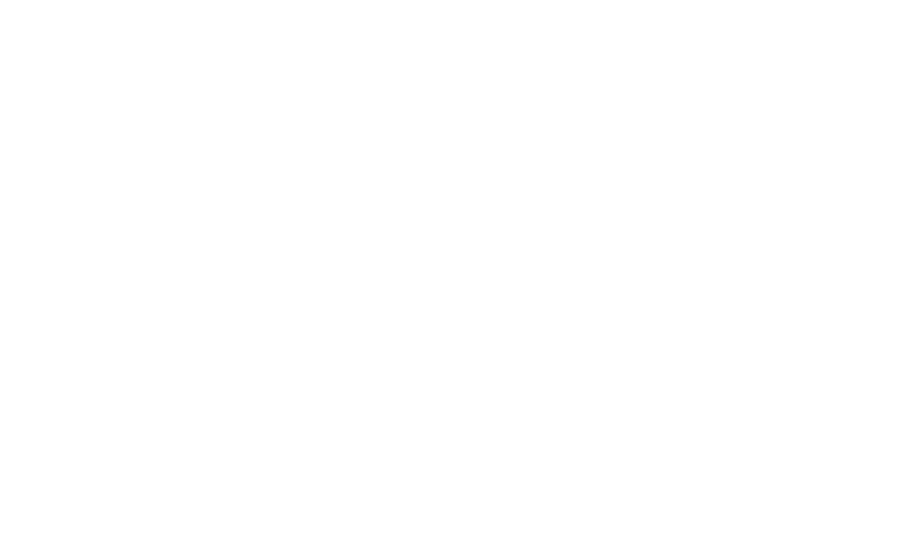

<IPython.core.display.Javascript object>


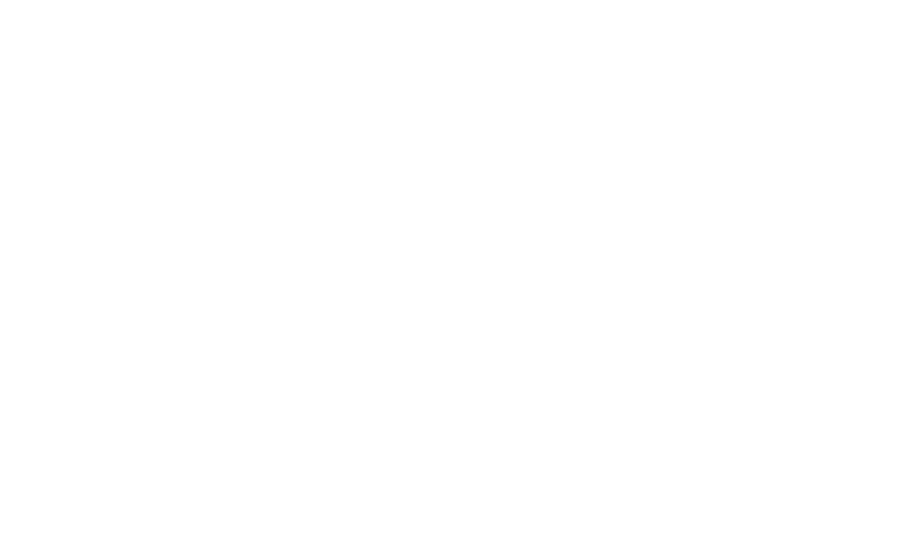

<IPython.core.display.Javascript object>


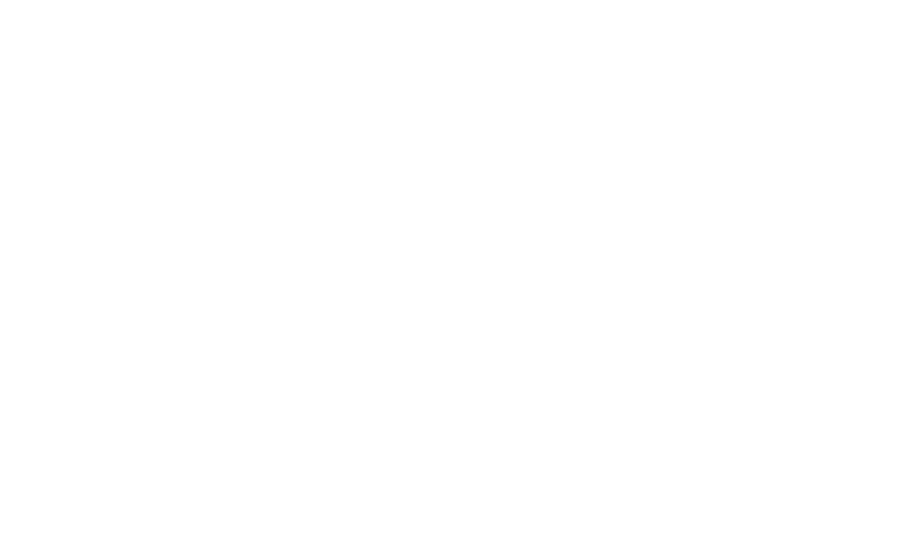

<IPython.core.display.Javascript object>


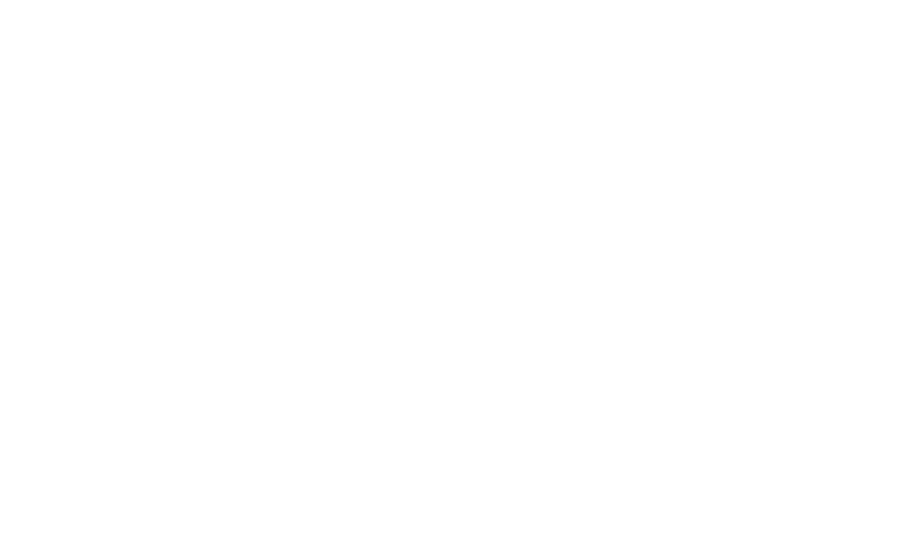

<IPython.core.display.Javascript object>


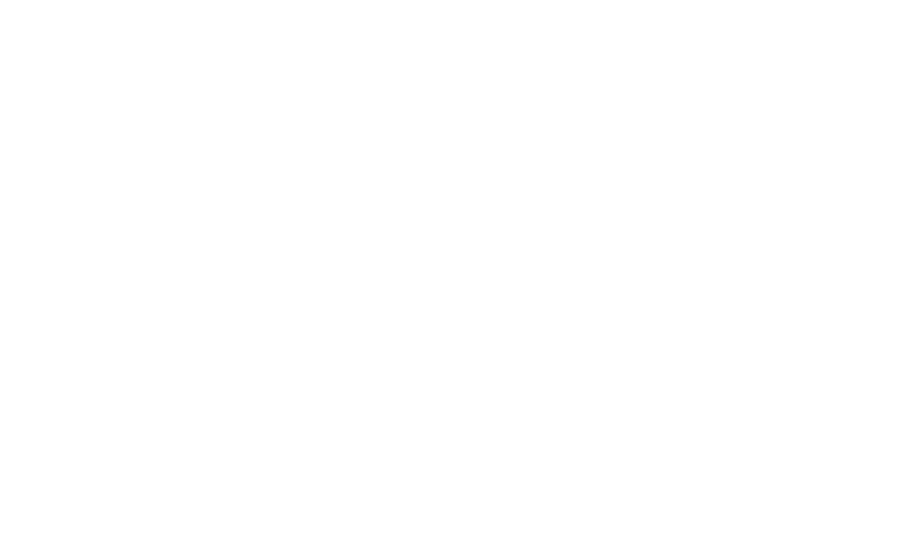

<IPython.core.display.Javascript object>


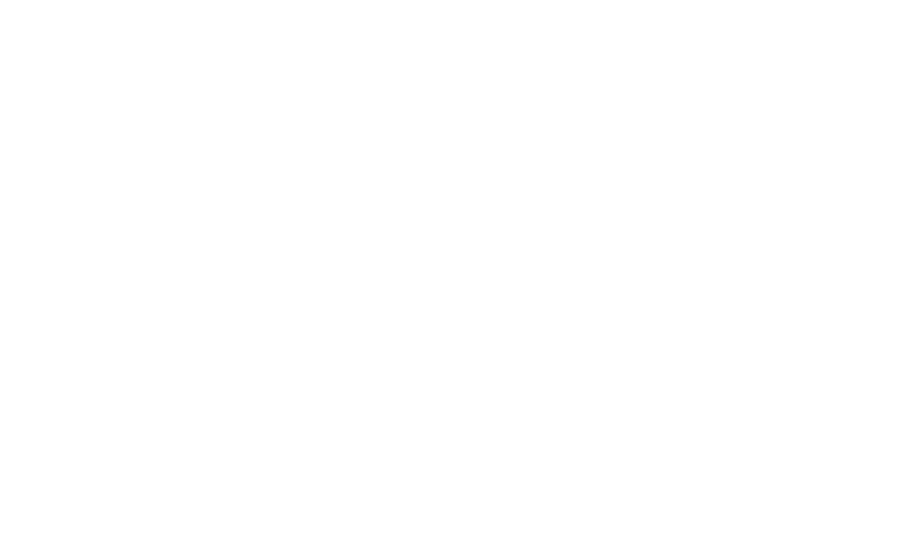

<IPython.core.display.Javascript object>


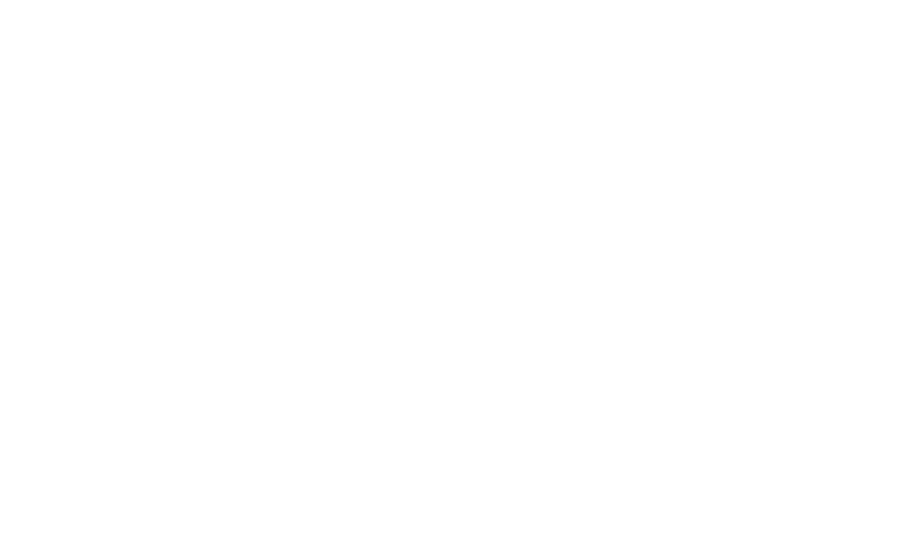

<IPython.core.display.Javascript object>


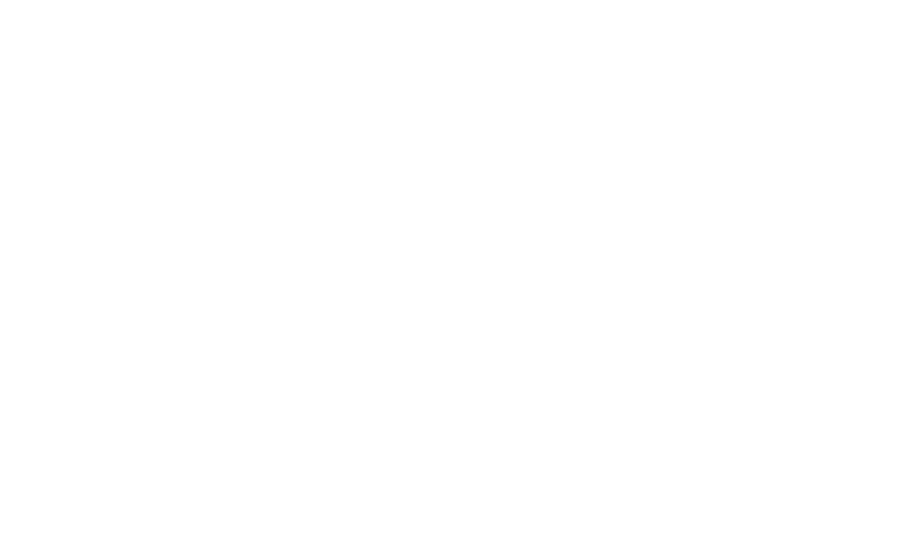

<IPython.core.display.Javascript object>


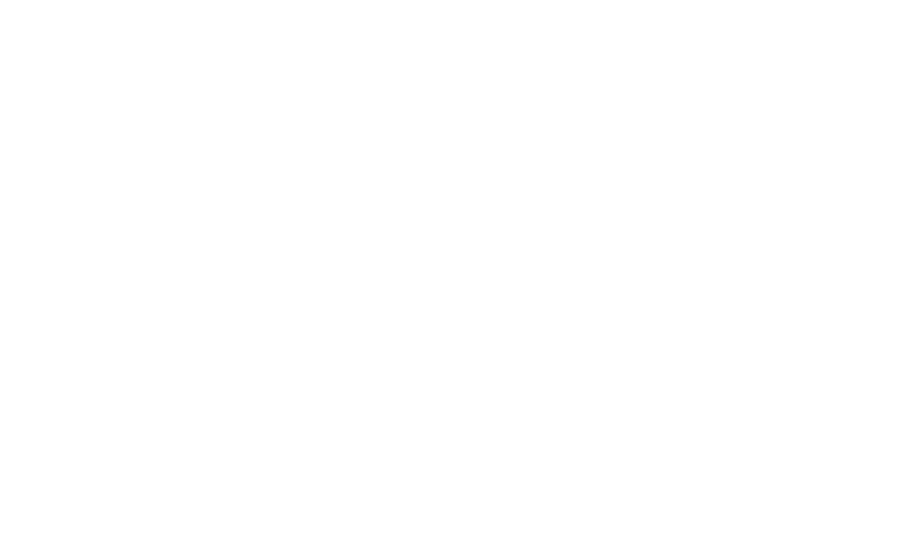

<IPython.core.display.Javascript object>


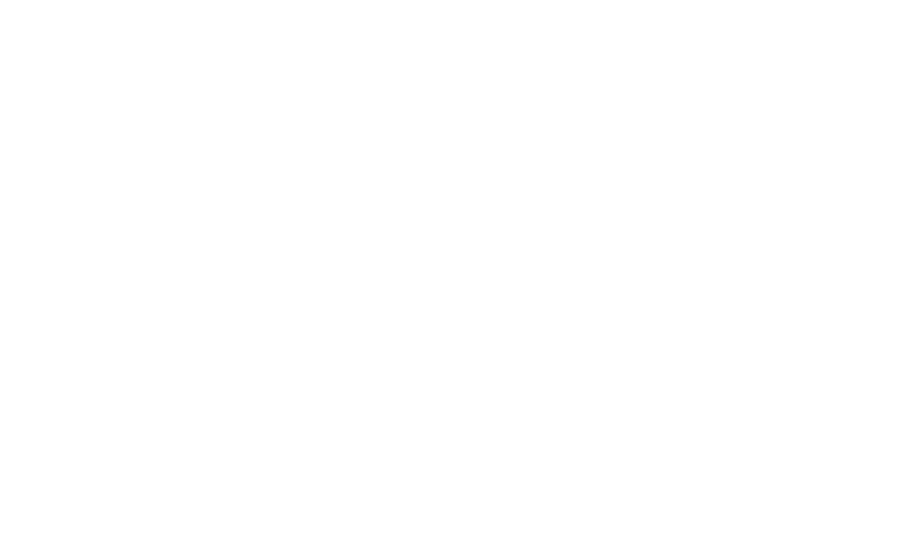

<IPython.core.display.Javascript object>


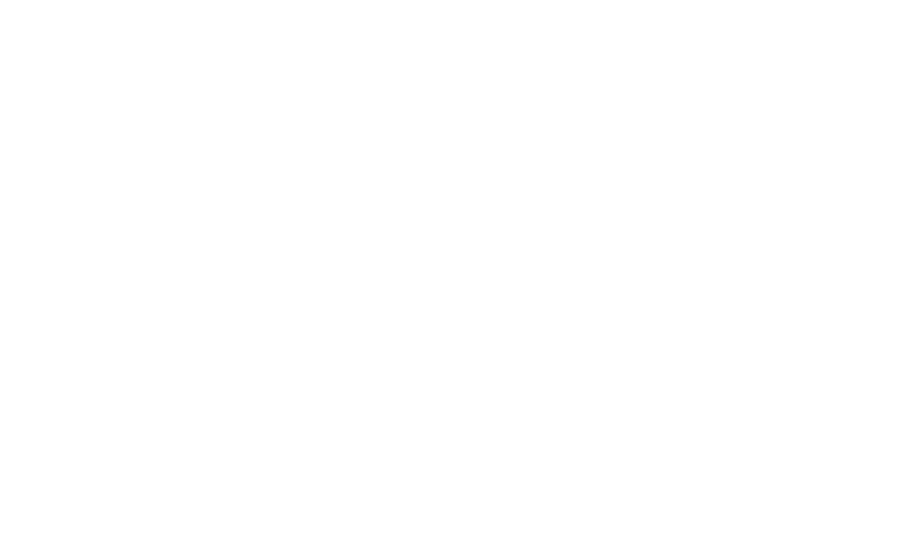

<IPython.core.display.Javascript object>


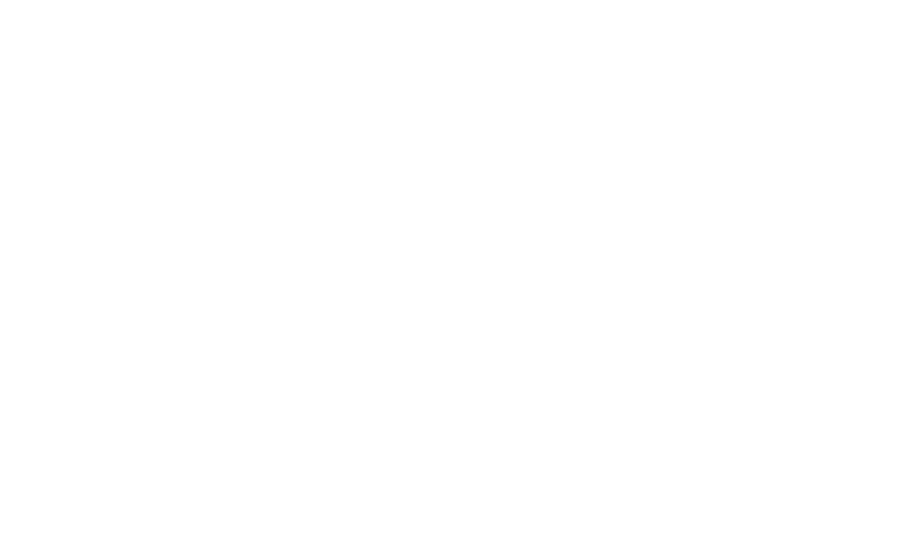

<IPython.core.display.Javascript object>


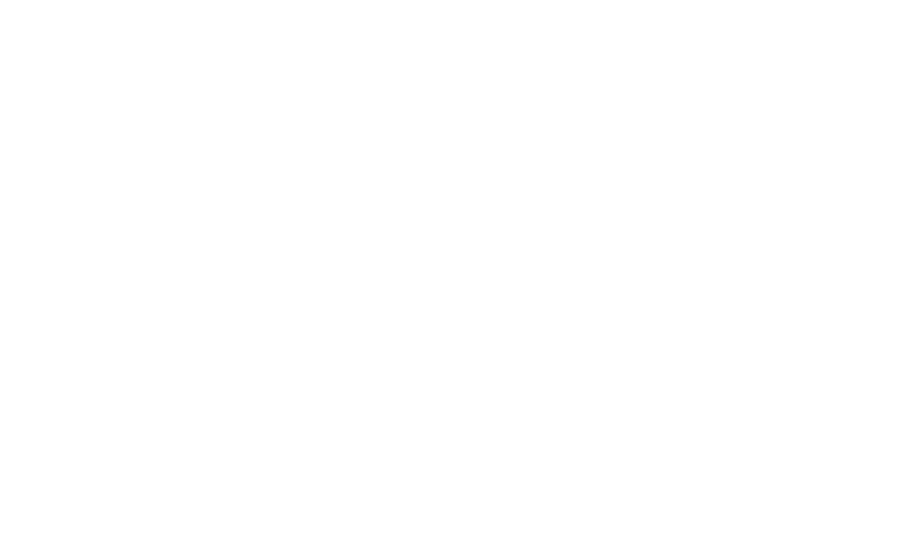

<IPython.core.display.Javascript object>


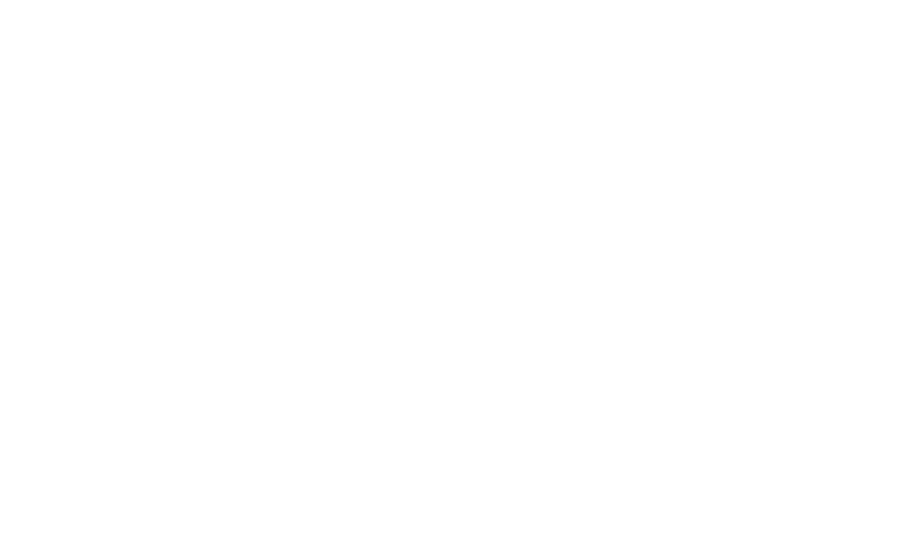

<IPython.core.display.Javascript object>


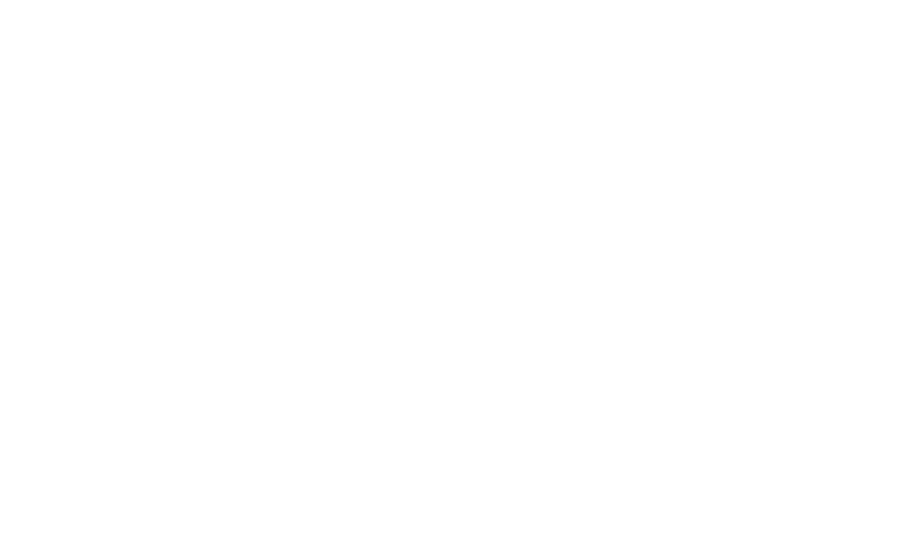

<IPython.core.display.Javascript object>


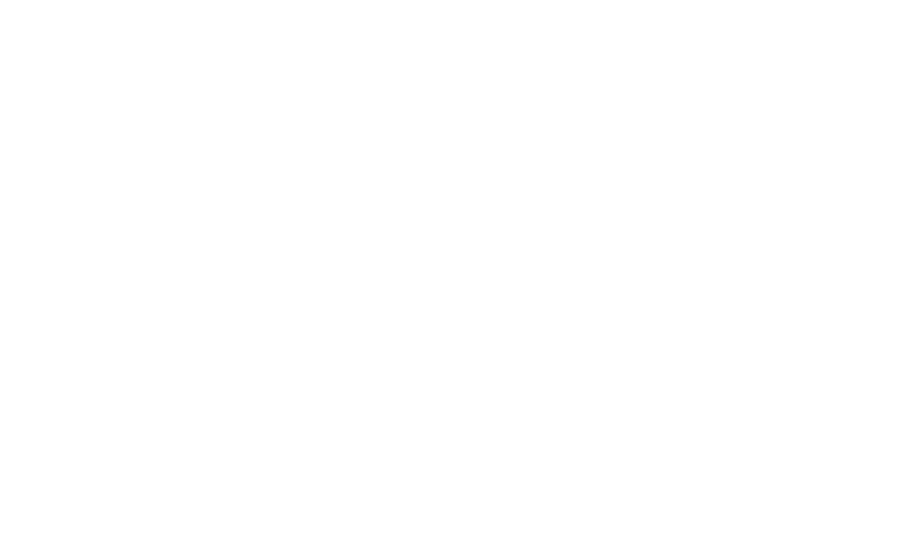

<IPython.core.display.Javascript object>


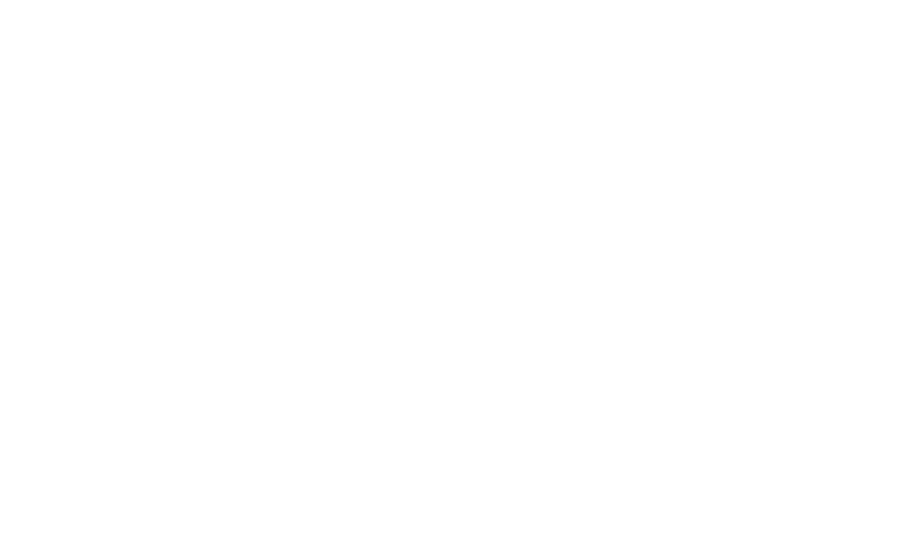

<IPython.core.display.Javascript object>


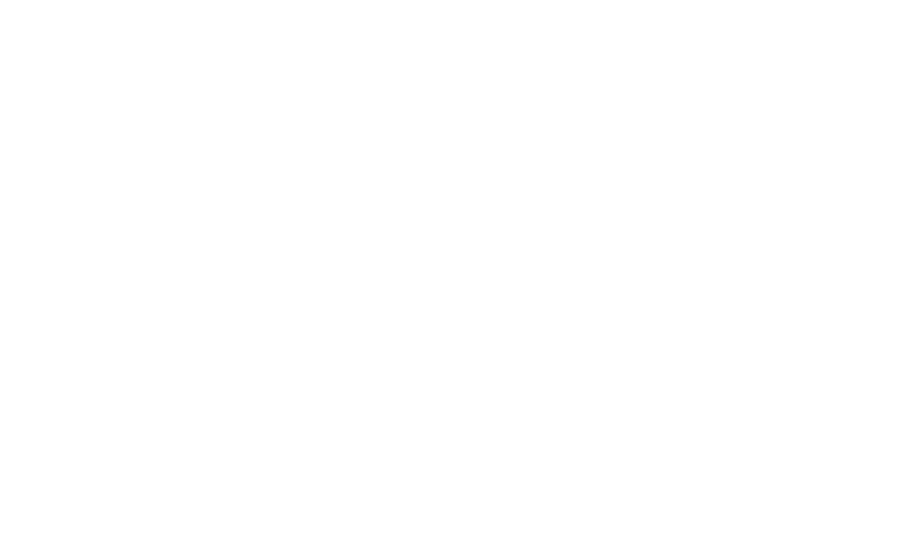

<IPython.core.display.Javascript object>


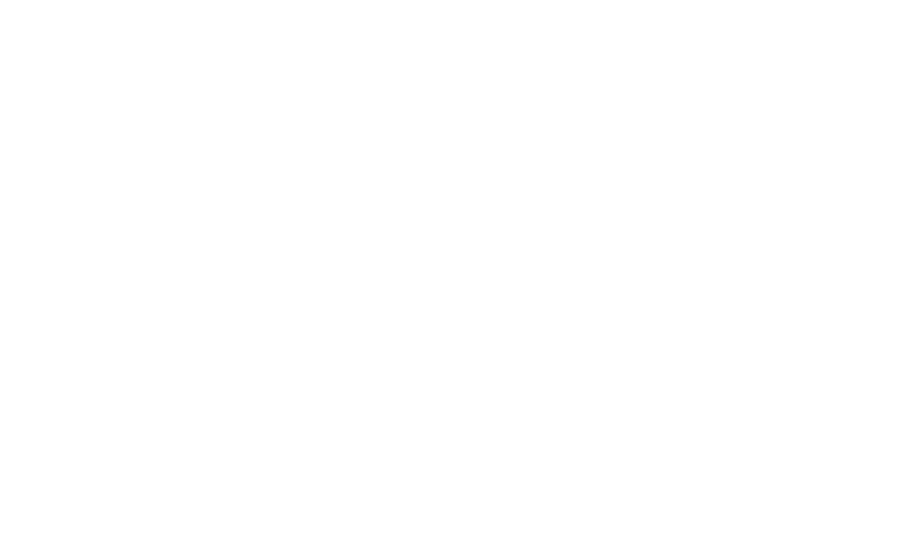

<IPython.core.display.Javascript object>


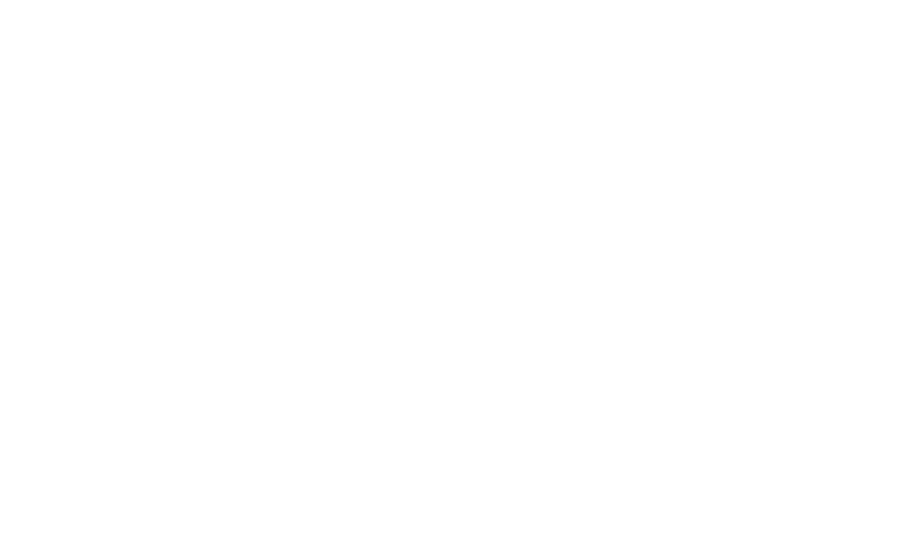

<IPython.core.display.Javascript object>


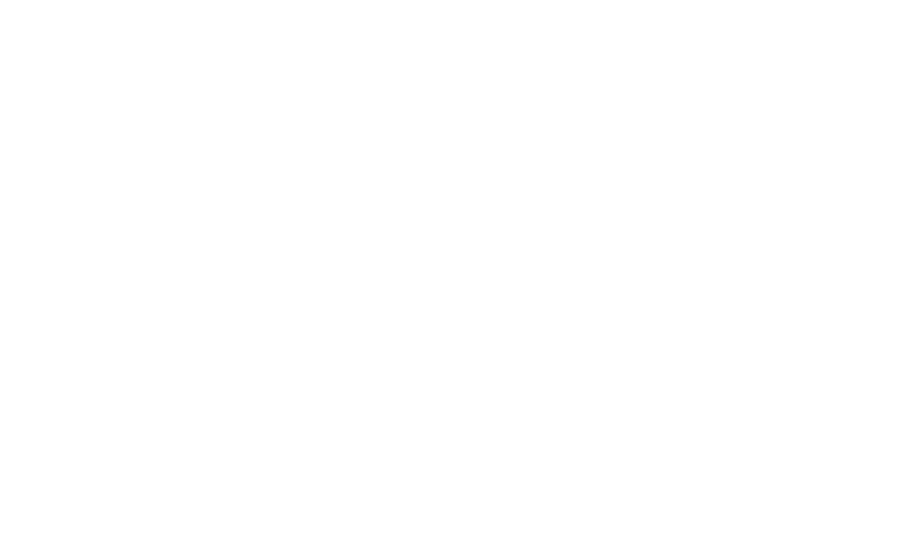

<IPython.core.display.Javascript object>


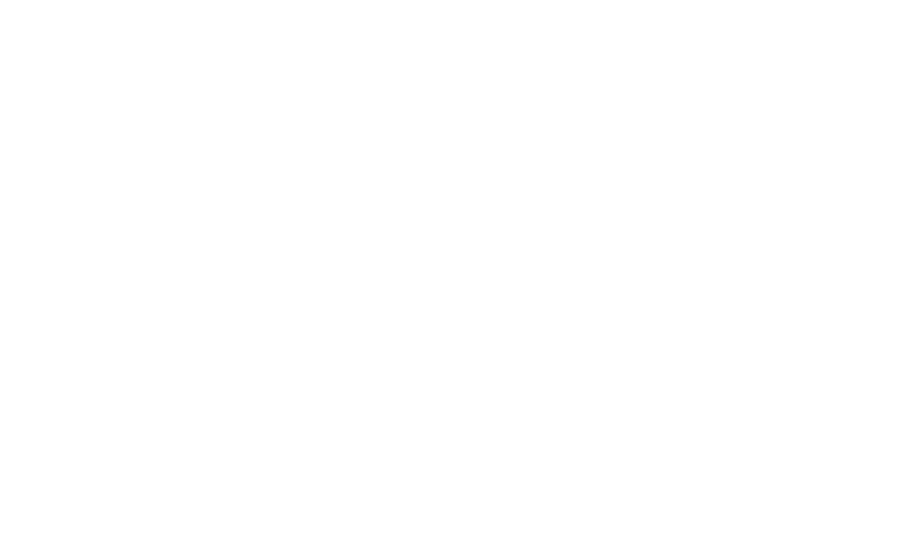

<IPython.core.display.Javascript object>


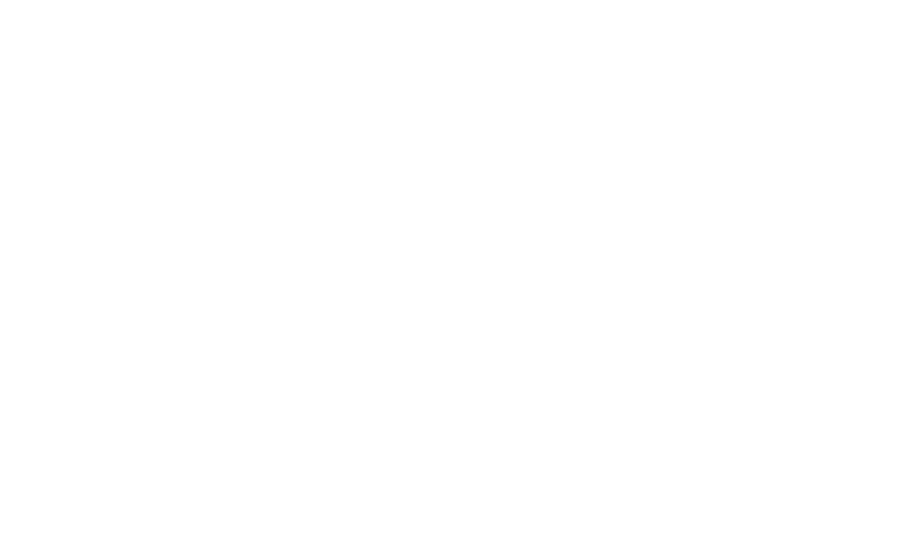

<IPython.core.display.Javascript object>


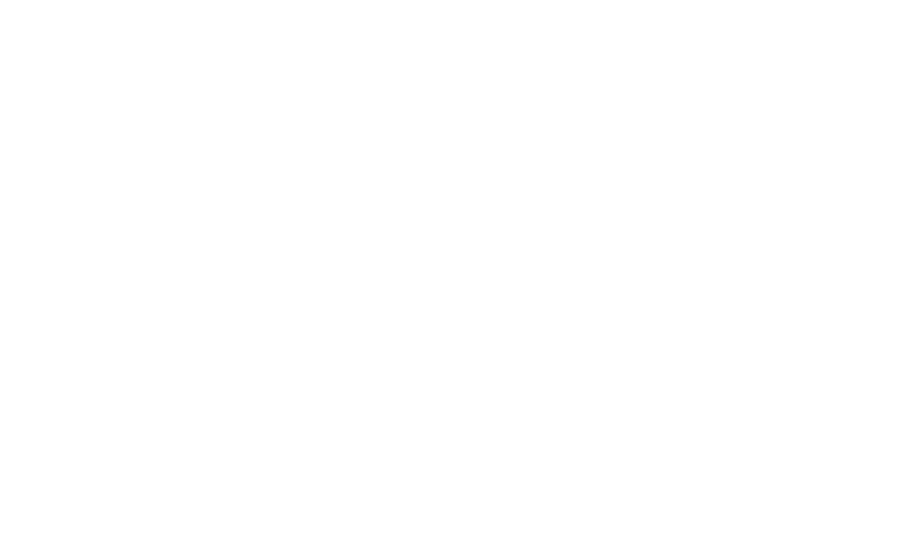

<IPython.core.display.Javascript object>


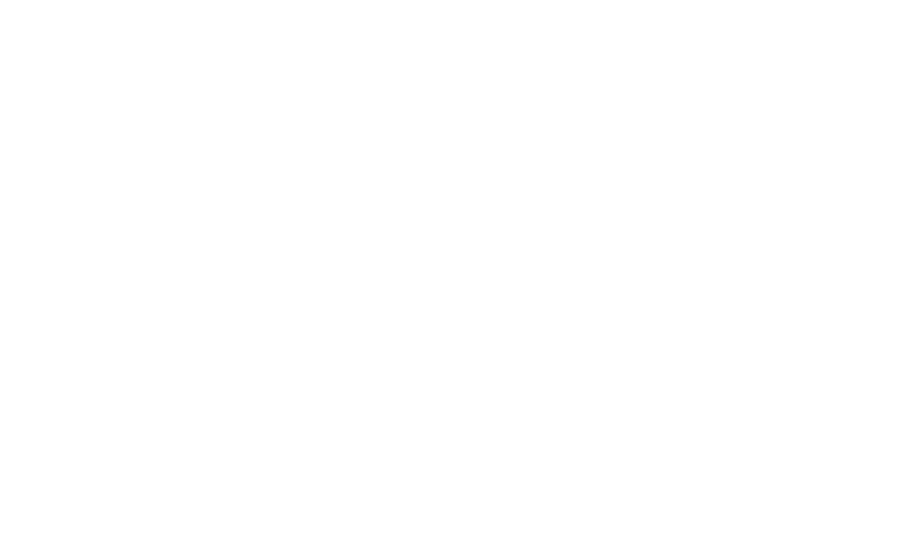

<IPython.core.display.Javascript object>


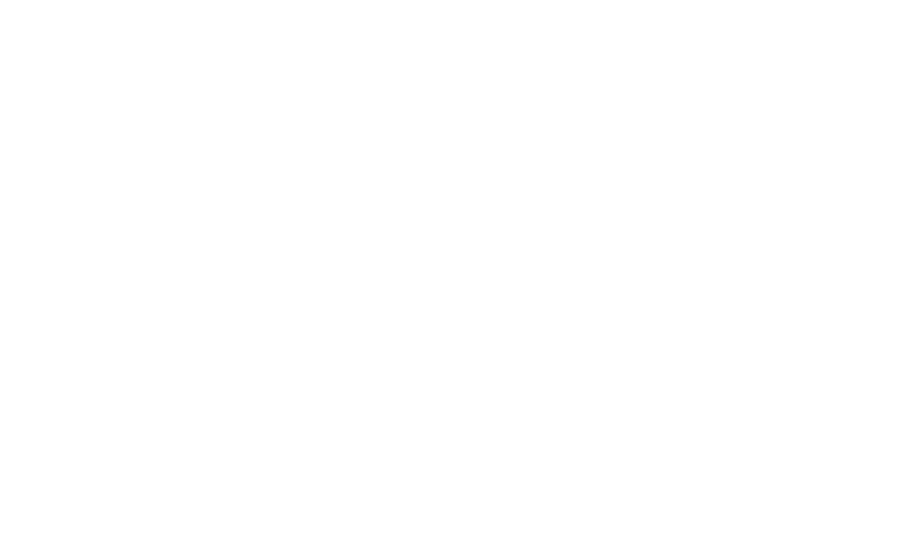

<IPython.core.display.Javascript object>


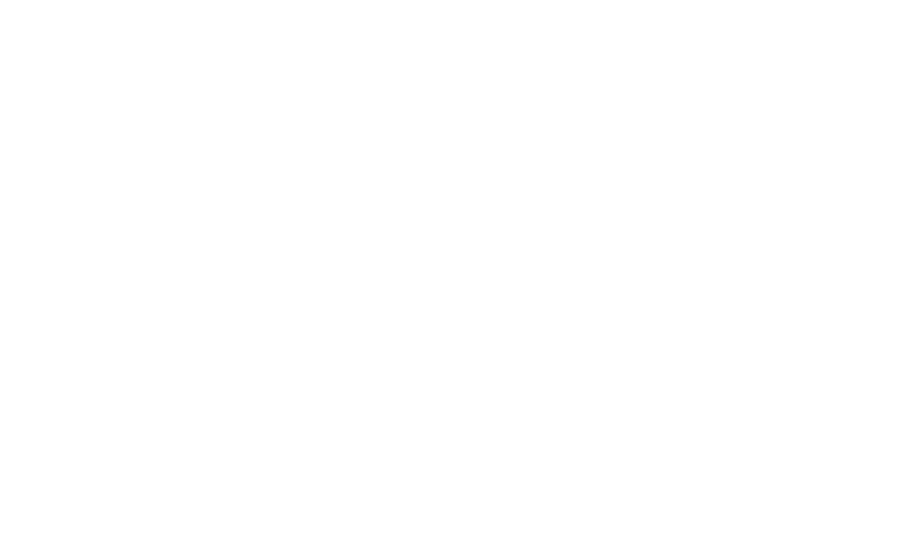

<IPython.core.display.Javascript object>


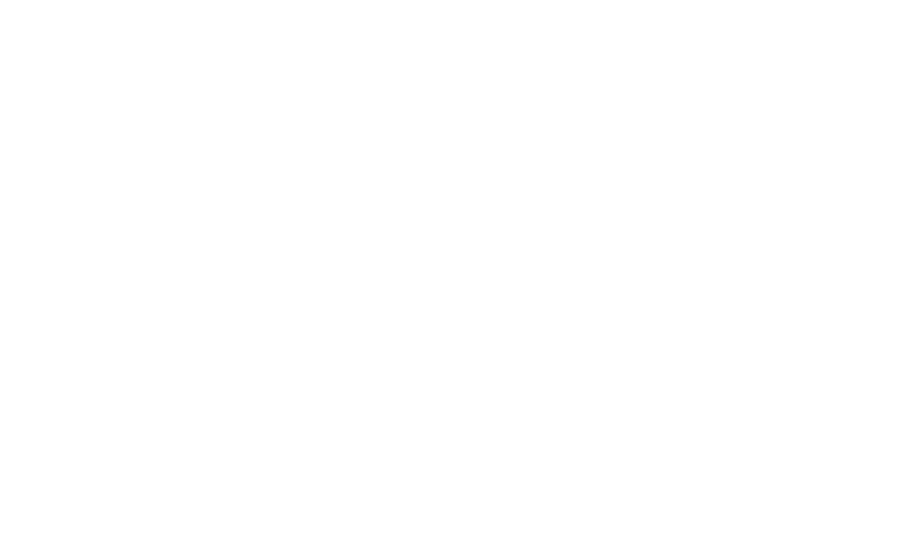

<IPython.core.display.Javascript object>


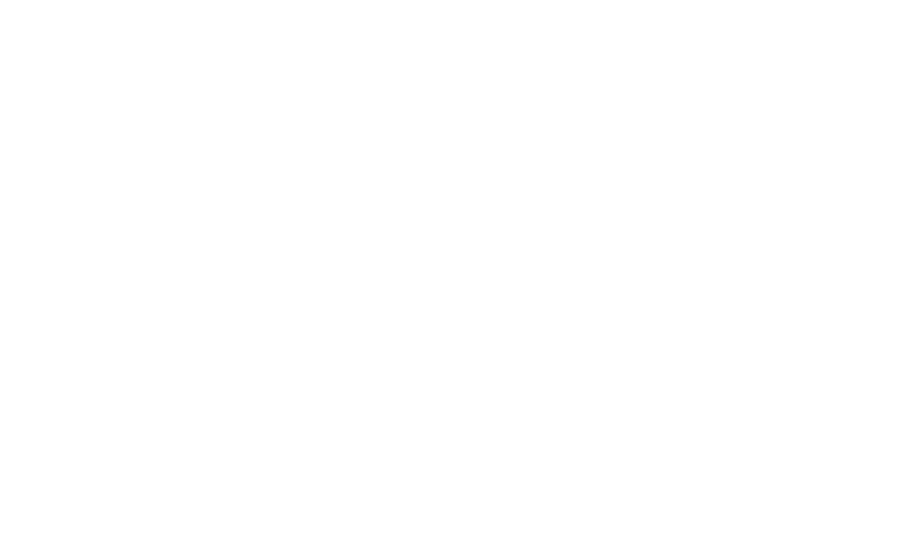

<IPython.core.display.Javascript object>


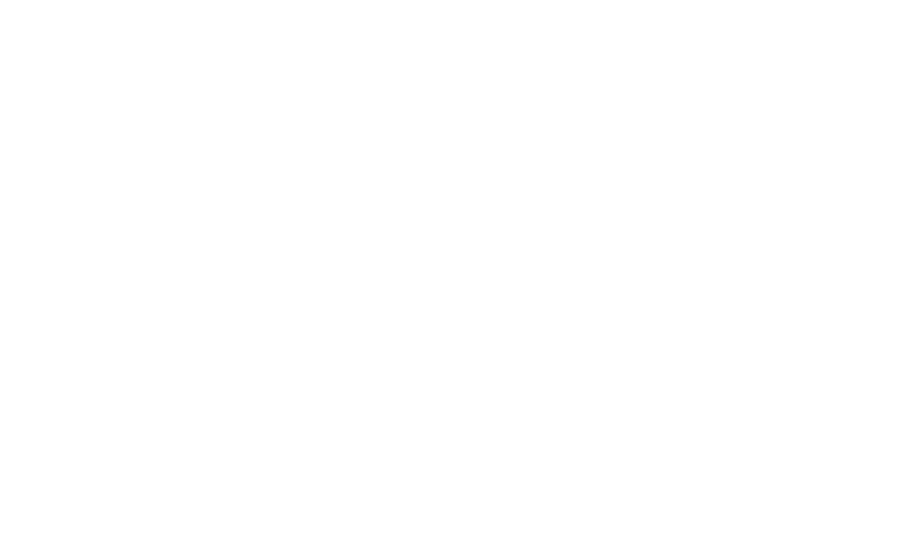

<IPython.core.display.Javascript object>


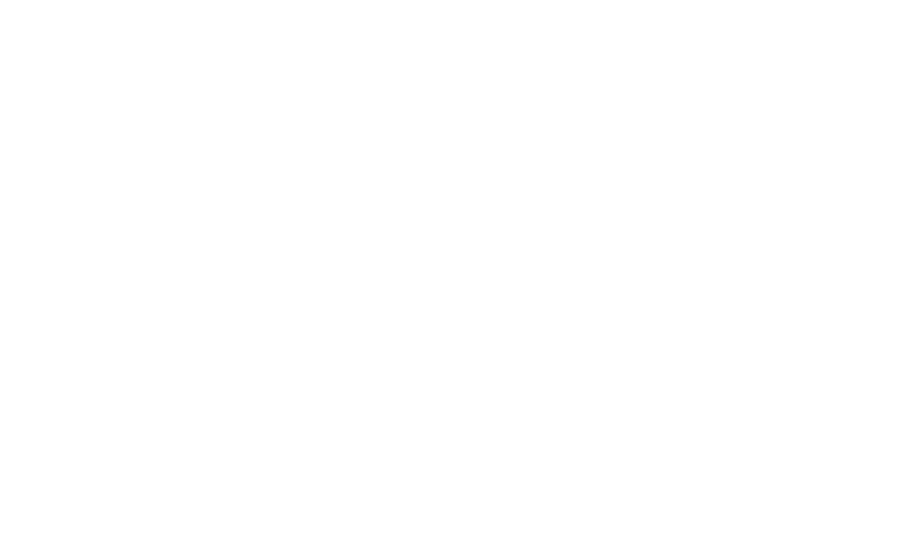

<IPython.core.display.Javascript object>


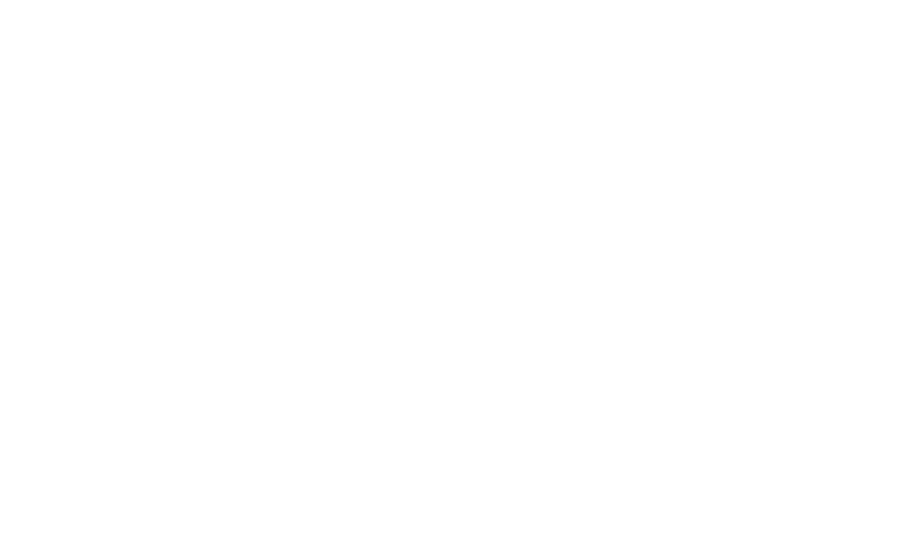

<IPython.core.display.Javascript object>


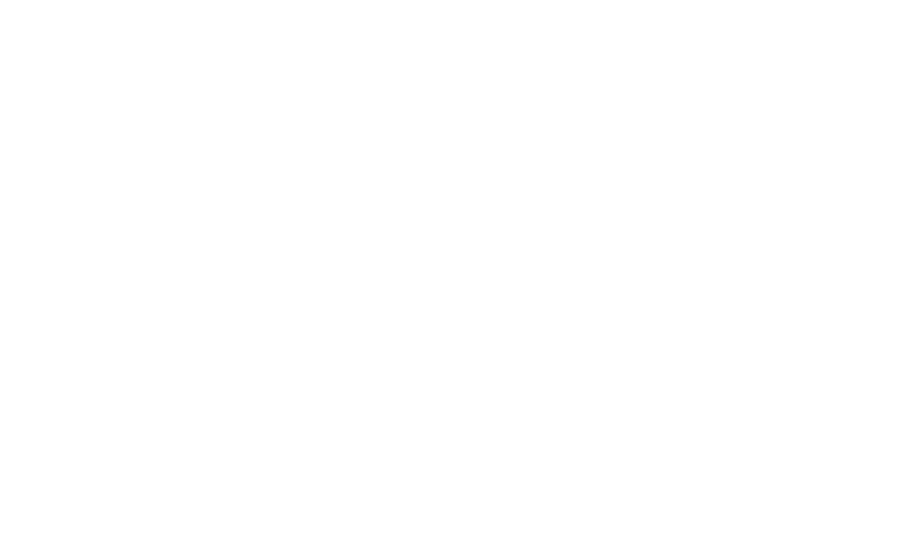

<IPython.core.display.Javascript object>


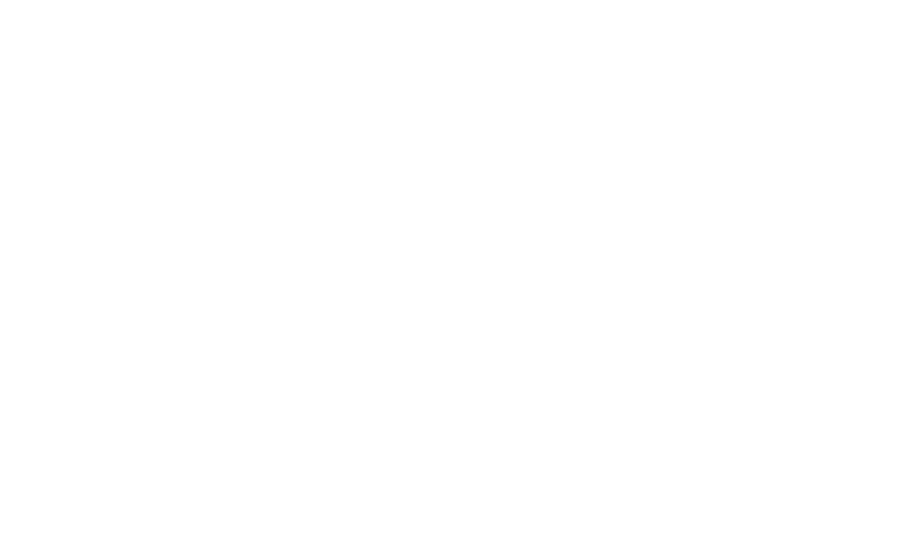

<IPython.core.display.Javascript object>


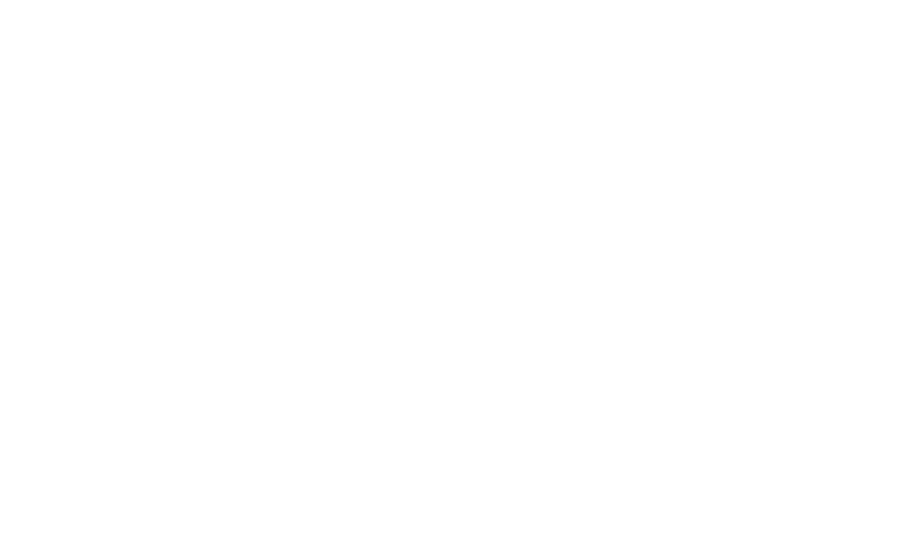

<IPython.core.display.Javascript object>


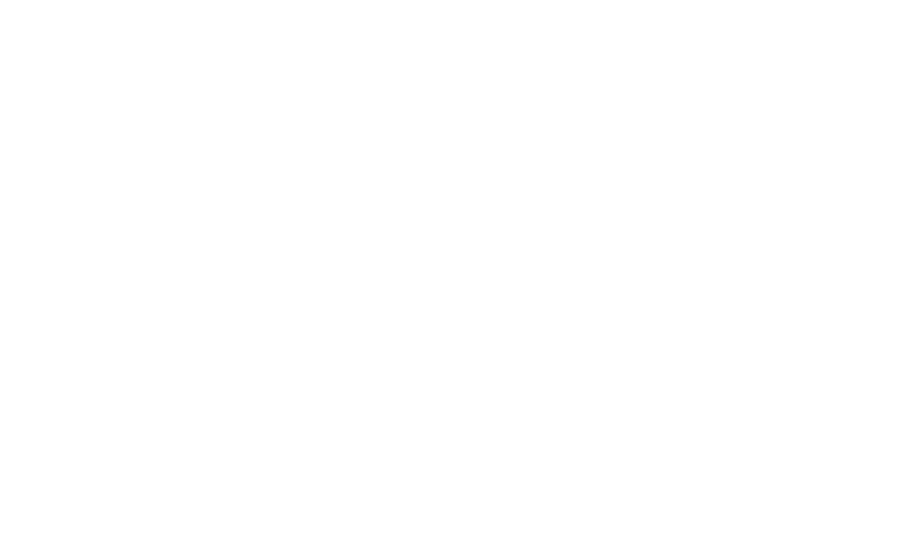

<IPython.core.display.Javascript object>


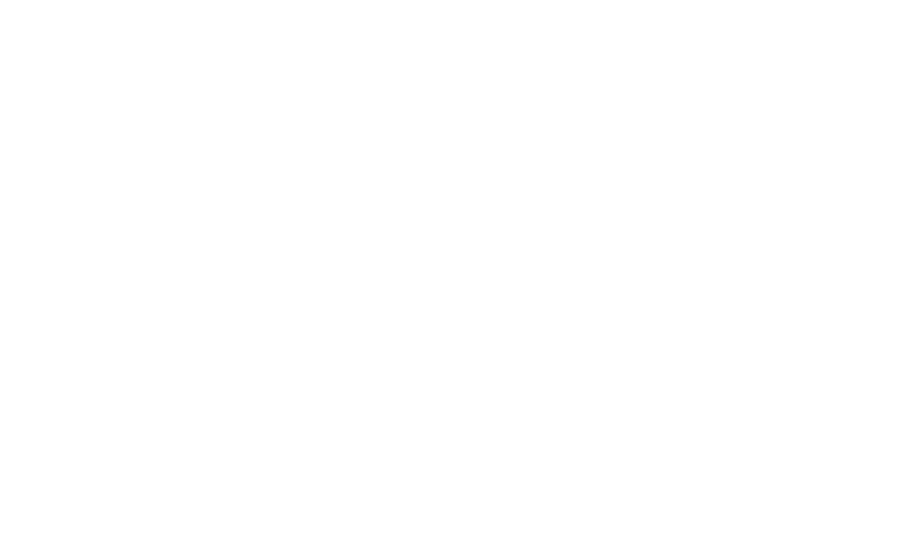

<IPython.core.display.Javascript object>


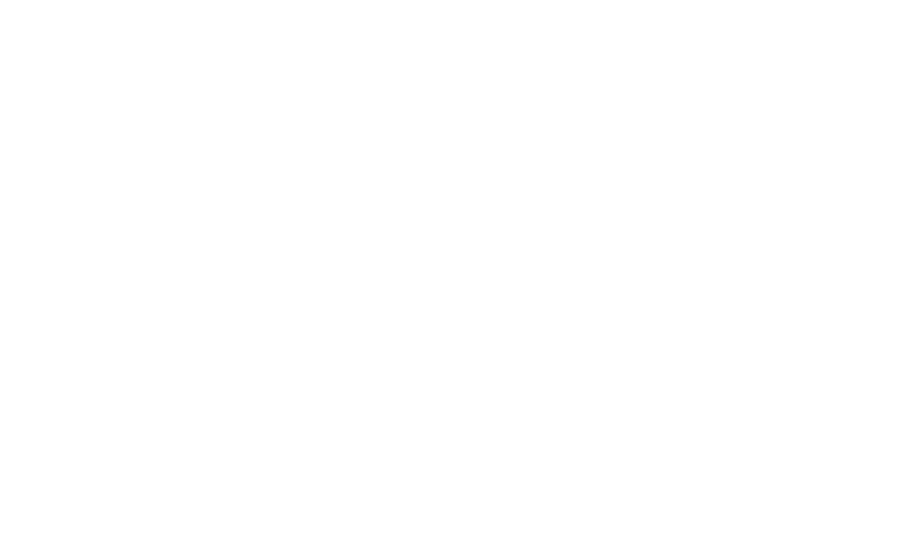

<IPython.core.display.Javascript object>


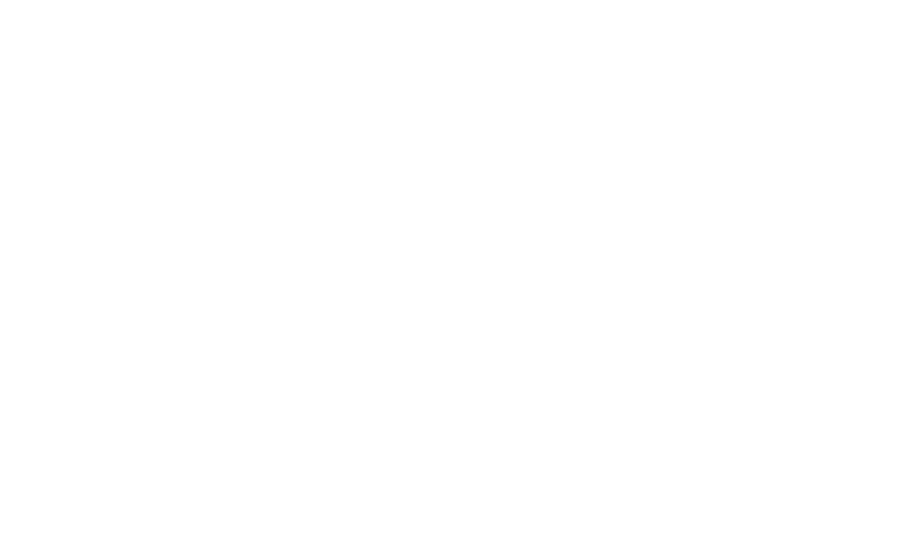

<IPython.core.display.Javascript object>


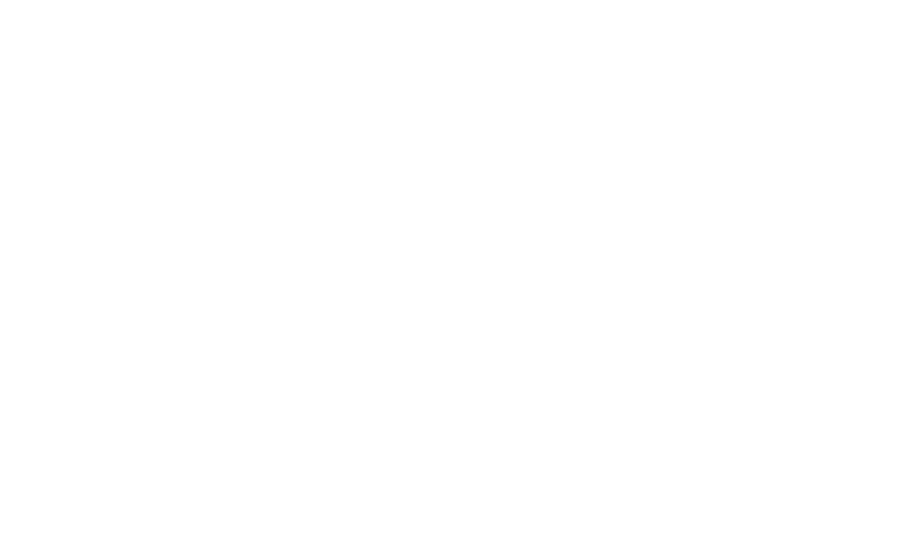

<IPython.core.display.Javascript object>


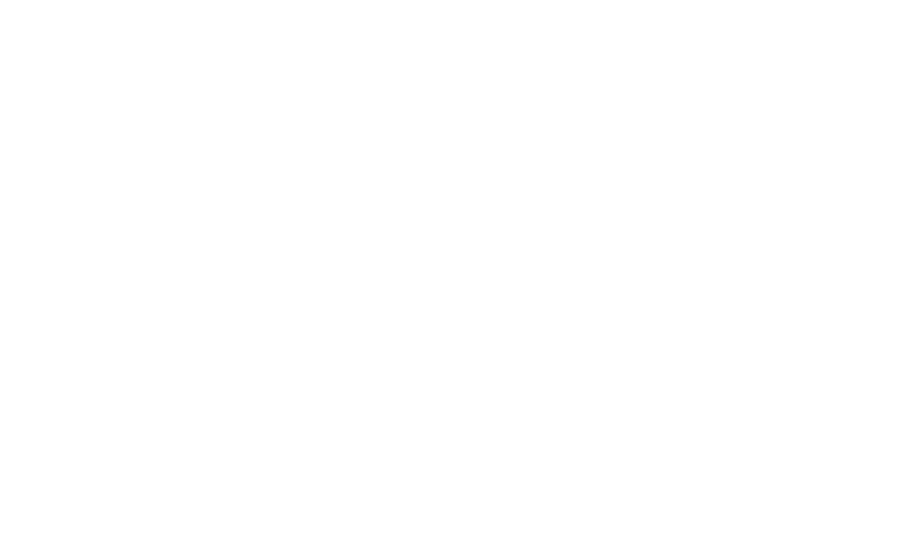

<IPython.core.display.Javascript object>


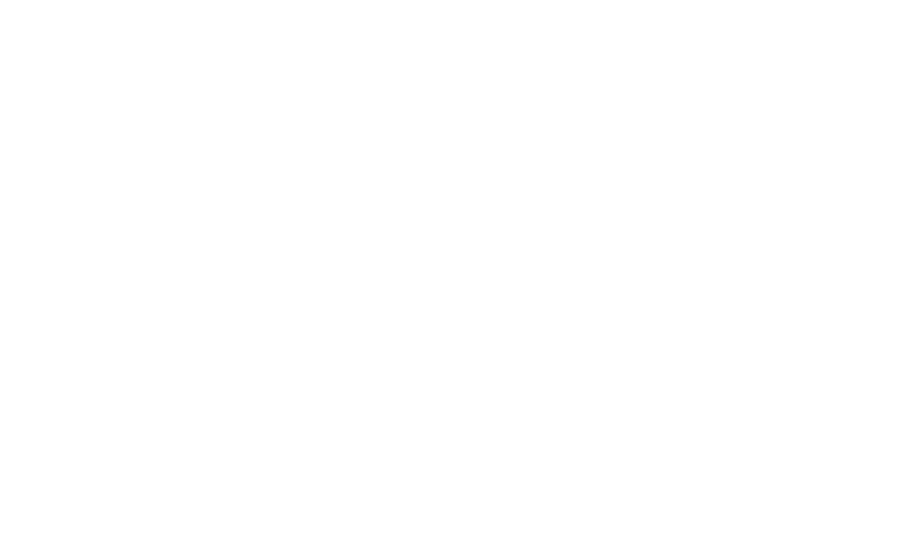

<IPython.core.display.Javascript object>


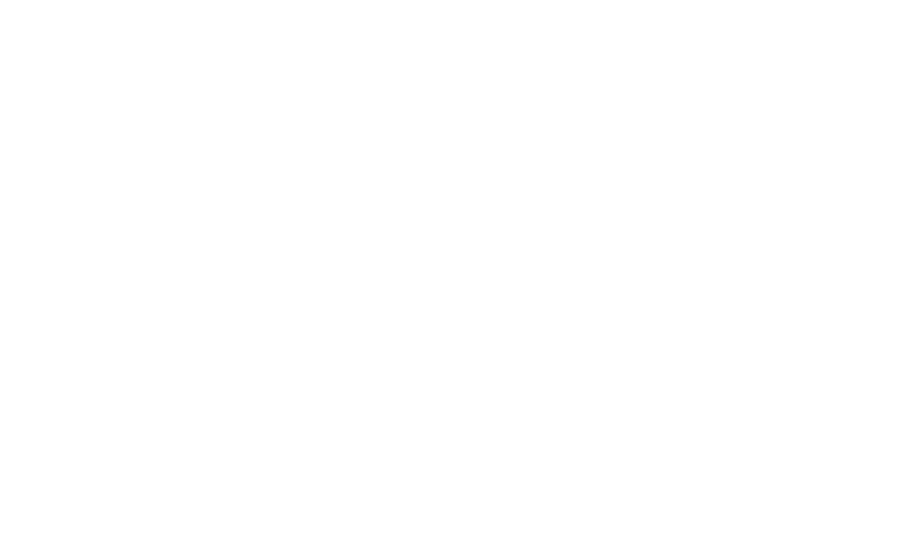

<IPython.core.display.Javascript object>


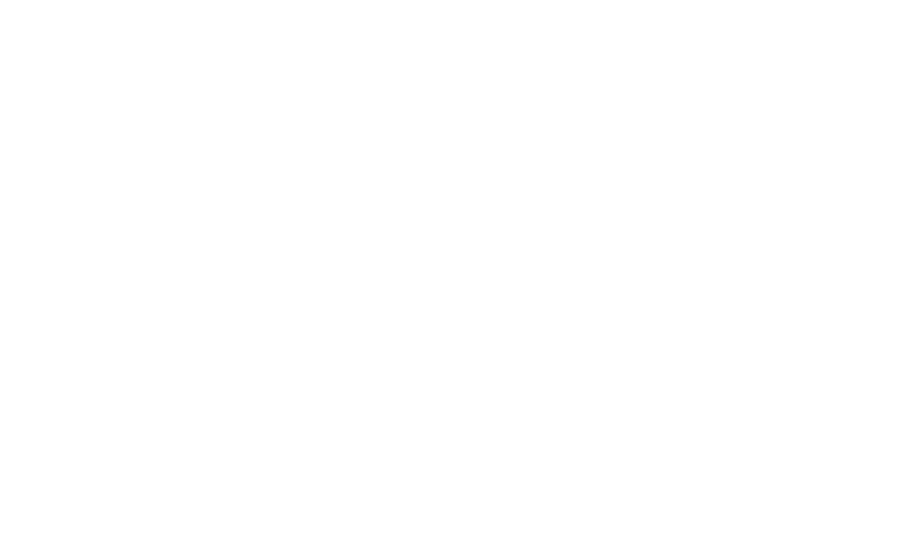

<IPython.core.display.Javascript object>


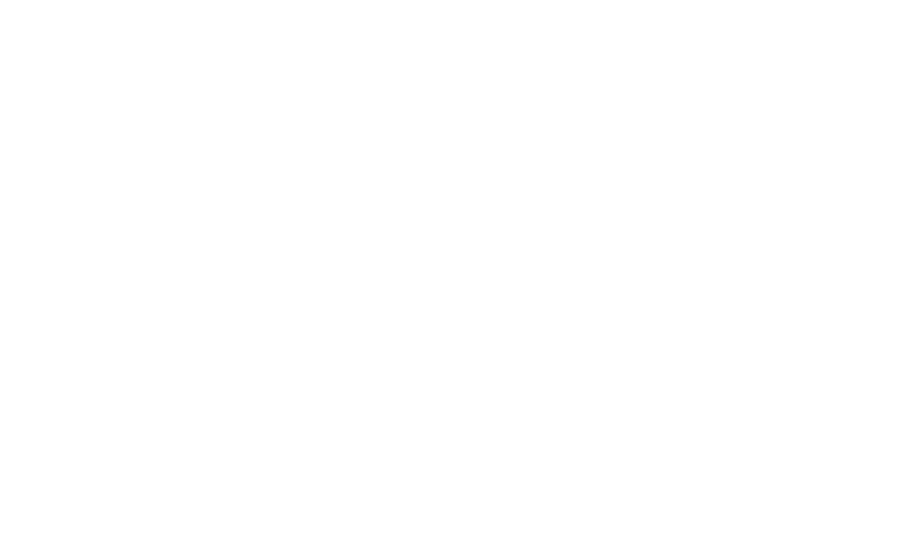

<IPython.core.display.Javascript object>


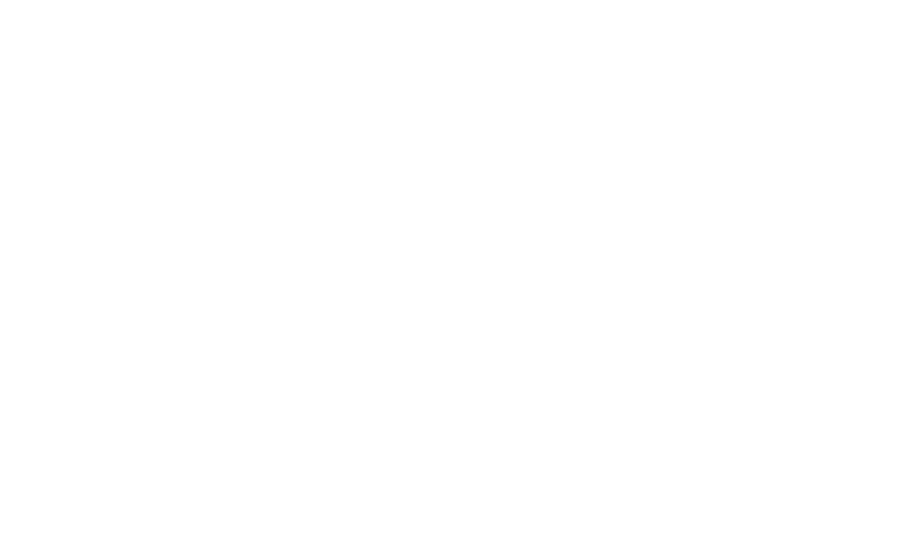

<IPython.core.display.Javascript object>


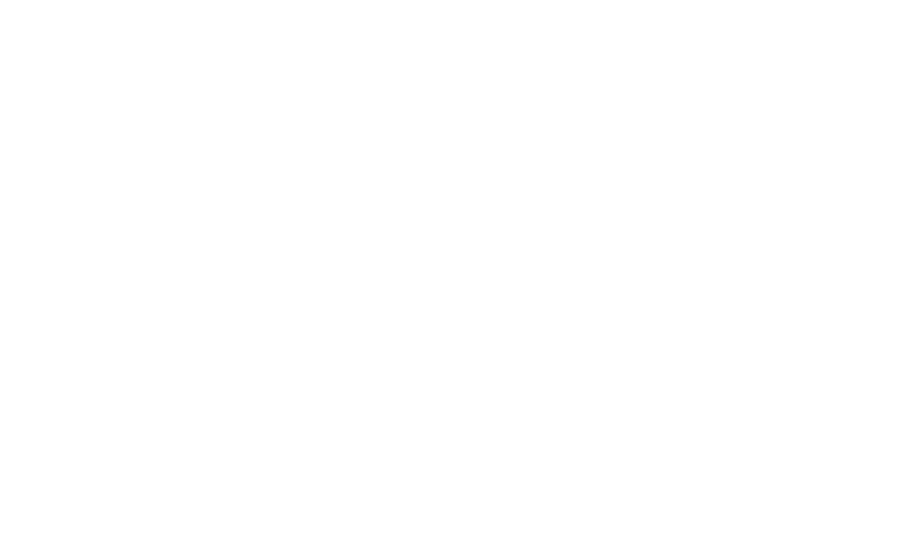

<IPython.core.display.Javascript object>


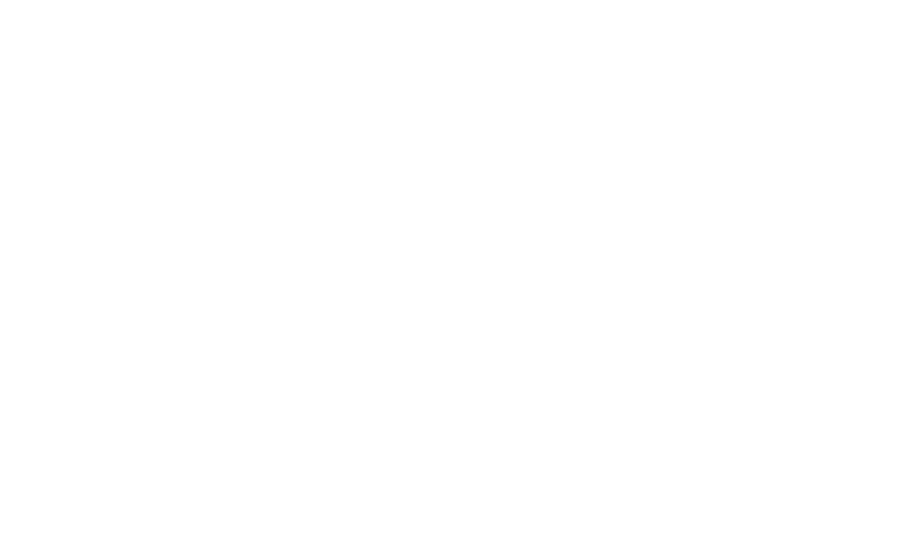

<IPython.core.display.Javascript object>


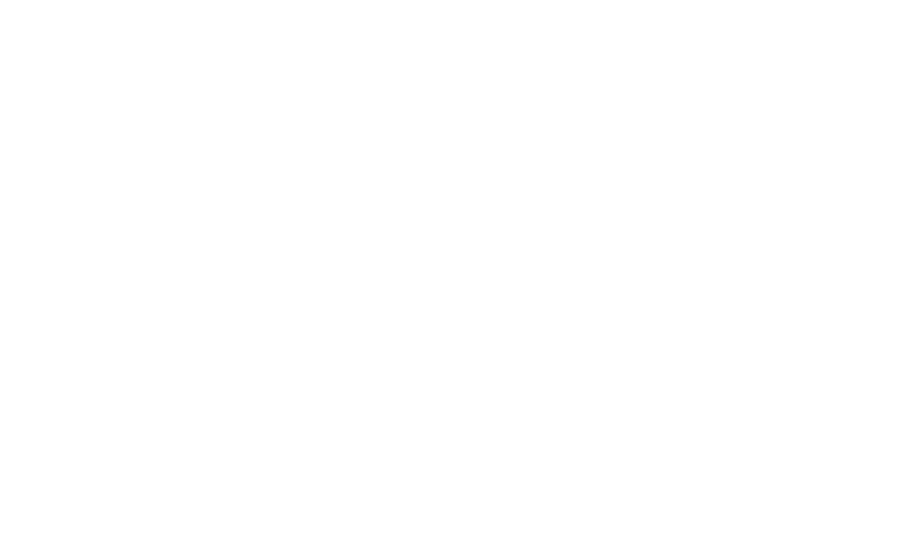

<IPython.core.display.Javascript object>


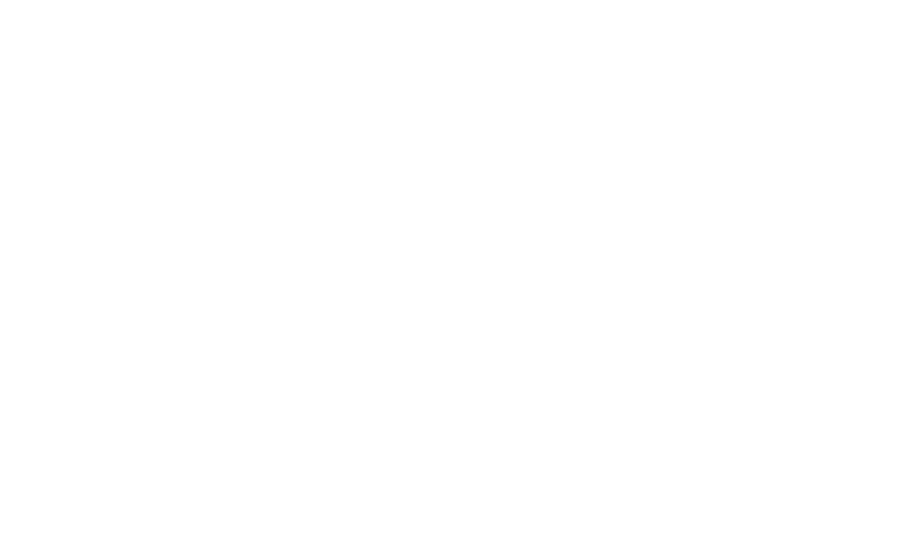

<IPython.core.display.Javascript object>


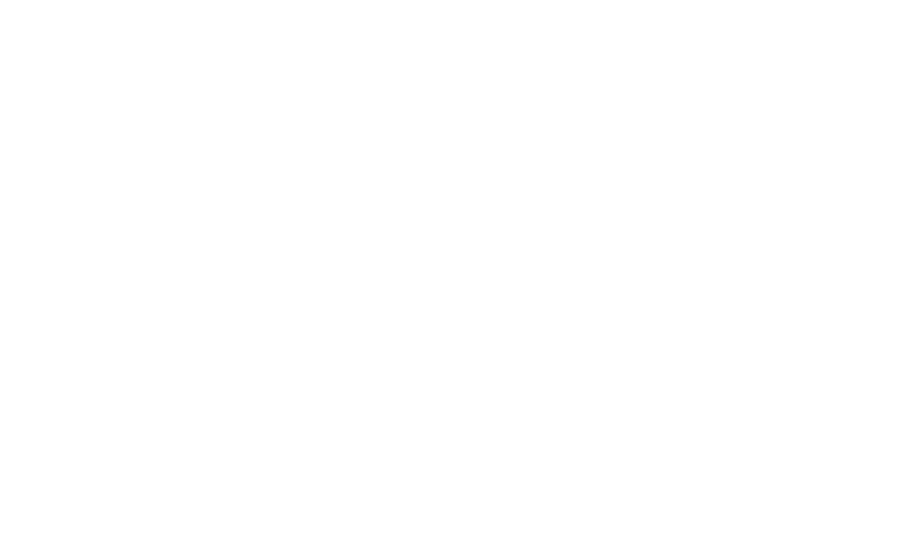

<IPython.core.display.Javascript object>


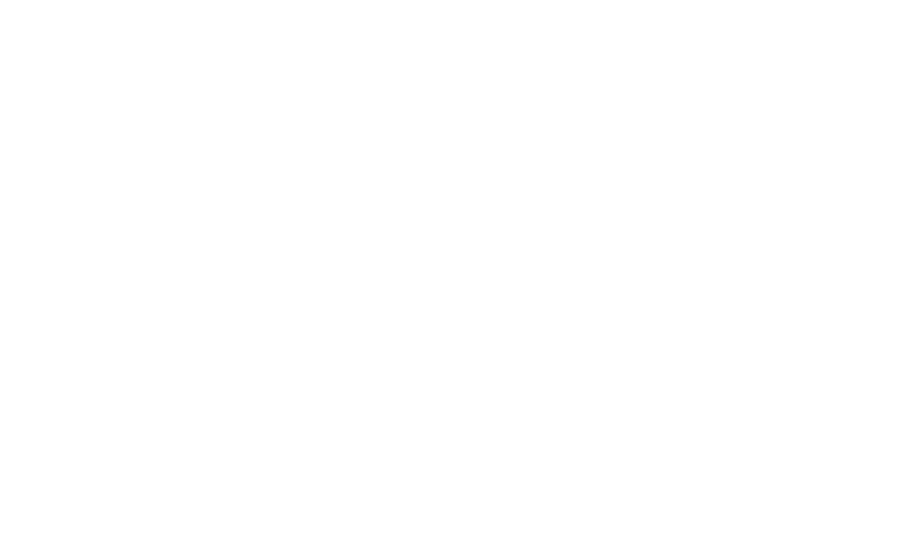

<IPython.core.display.Javascript object>


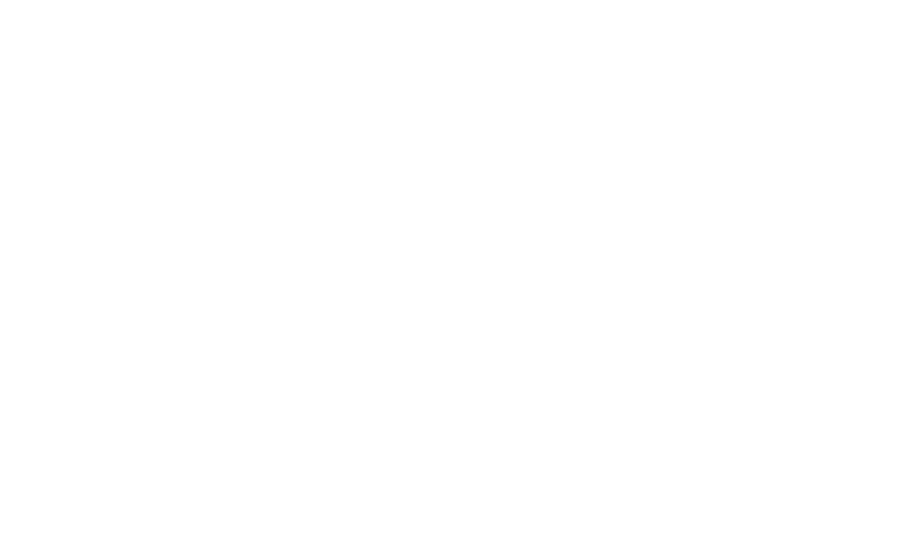

KeyboardInterrupt: 

In [4]:
model = np.load('caspec_MS_mags.npy',allow_pickle=True).item()
camp = 17
ex, dat = Tonry_reduce(data,camp)

zps_z = np.zeros(80)
zps_k = np.zeros(80)
for i in range(80):

    compare_z = np.array([['g-r','g-z'],['g-r','r-z'],['g-r','i-z'],['g-r','g-i']])
    compare_k = np.array([['g-r','g-k'],['g-r','r-k'],['g-r','k-i'],['g-r','k-z']])
    dd = dat.iloc[dat['Channel'].values==i+1]
    if len(dat) > 0:
        zp_z, d_z = Fit_zeropoint(dd,model,compare_z,ex,'z')
        zp_k, d_k = Fit_zeropoint(dd,model,compare_k,ex,'k')
        zps_z[i] = zp_z
        zps_k[i] = zp_k
        c_z = Make_colours(d_z,model,compare_z,Extinction = ex)
        c_k = Make_colours(d_k,model,compare_k,Extinction = ex)
        Plotter(zp_z,c_z,compare_z,i+1,1,'z','./figs/',Close=True)
        Plotter(zp_z,c_z,compare_z,i+1,1,'z','./figs/',Residuals=True,Close=True)

        Plotter(zp_k,c_k,compare_k,i+1,1,'k','./figs/',Close=True)
        Plotter(zp_k,c_k,compare_k,i+1,1,'k','./figs/',Residuals=True,Close=True)

In [8]:
zps_z[zps_z  == 0] = np.nan
zps_k[zps_k  == 0] = np.nan

<IPython.core.display.Javascript object>


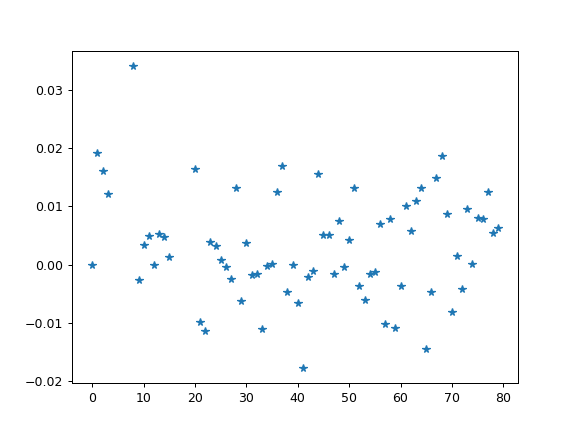

In [11]:
plt.figure()
#plt.subplot(121)
#plt.plot(zps_z,'.')
#plt.subplot(122)
plt.plot(zps_z,'*')

In [26]:
wdregion = pd.read_csv('../calibration/kepler/WD_region.csv')

In [27]:
ri = wdregion['rMeanPSFMag'] - wdregion['iMeanPSFMag']
gr = wdregion['gMeanPSFMag'] - wdregion['rMeanPSFMag']
iz = wdregion['iMeanPSFMag'] - wdregion['zMeanPSFMag']

<IPython.core.display.Javascript object>


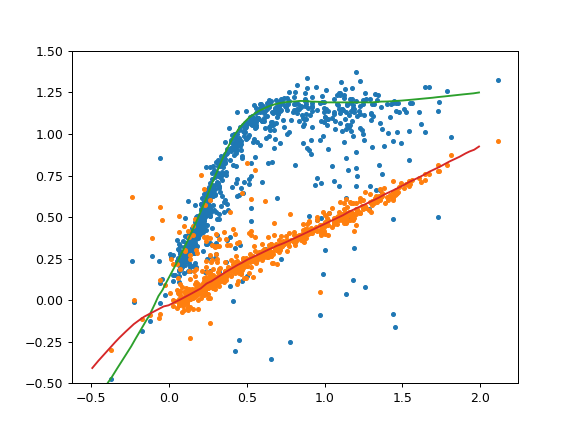

(-0.5, 1.5)

In [29]:
plt.figure()
plt.plot(ri,gr,'.')
plt.plot(ri,iz,'.')
plt.plot(tonry[:,0],tonry[:,1],'-')
plt.plot(tonry[:,0],tonry[:,2],'-')
plt.ylim(-0.5,1.5)